<a href="https://colab.research.google.com/github/Esther1990-cloud/aiffel/blob/master/DS2%EA%B8%B0_%ED%86%B5%EA%B3%84_%EB%A9%94%EC%9D%B8%ED%80%98%EC%8A%A4%ED%8A%B8_%EA%B9%80%EC%B0%AC%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

df1 = df.copy()

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. \
이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

- pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.

아래의 코드를 활용하세요.

```python
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()
```

Population Mean: 17.99
Population Std: 378.81
Sample Mean: 16.83
Sample Std: 64.47


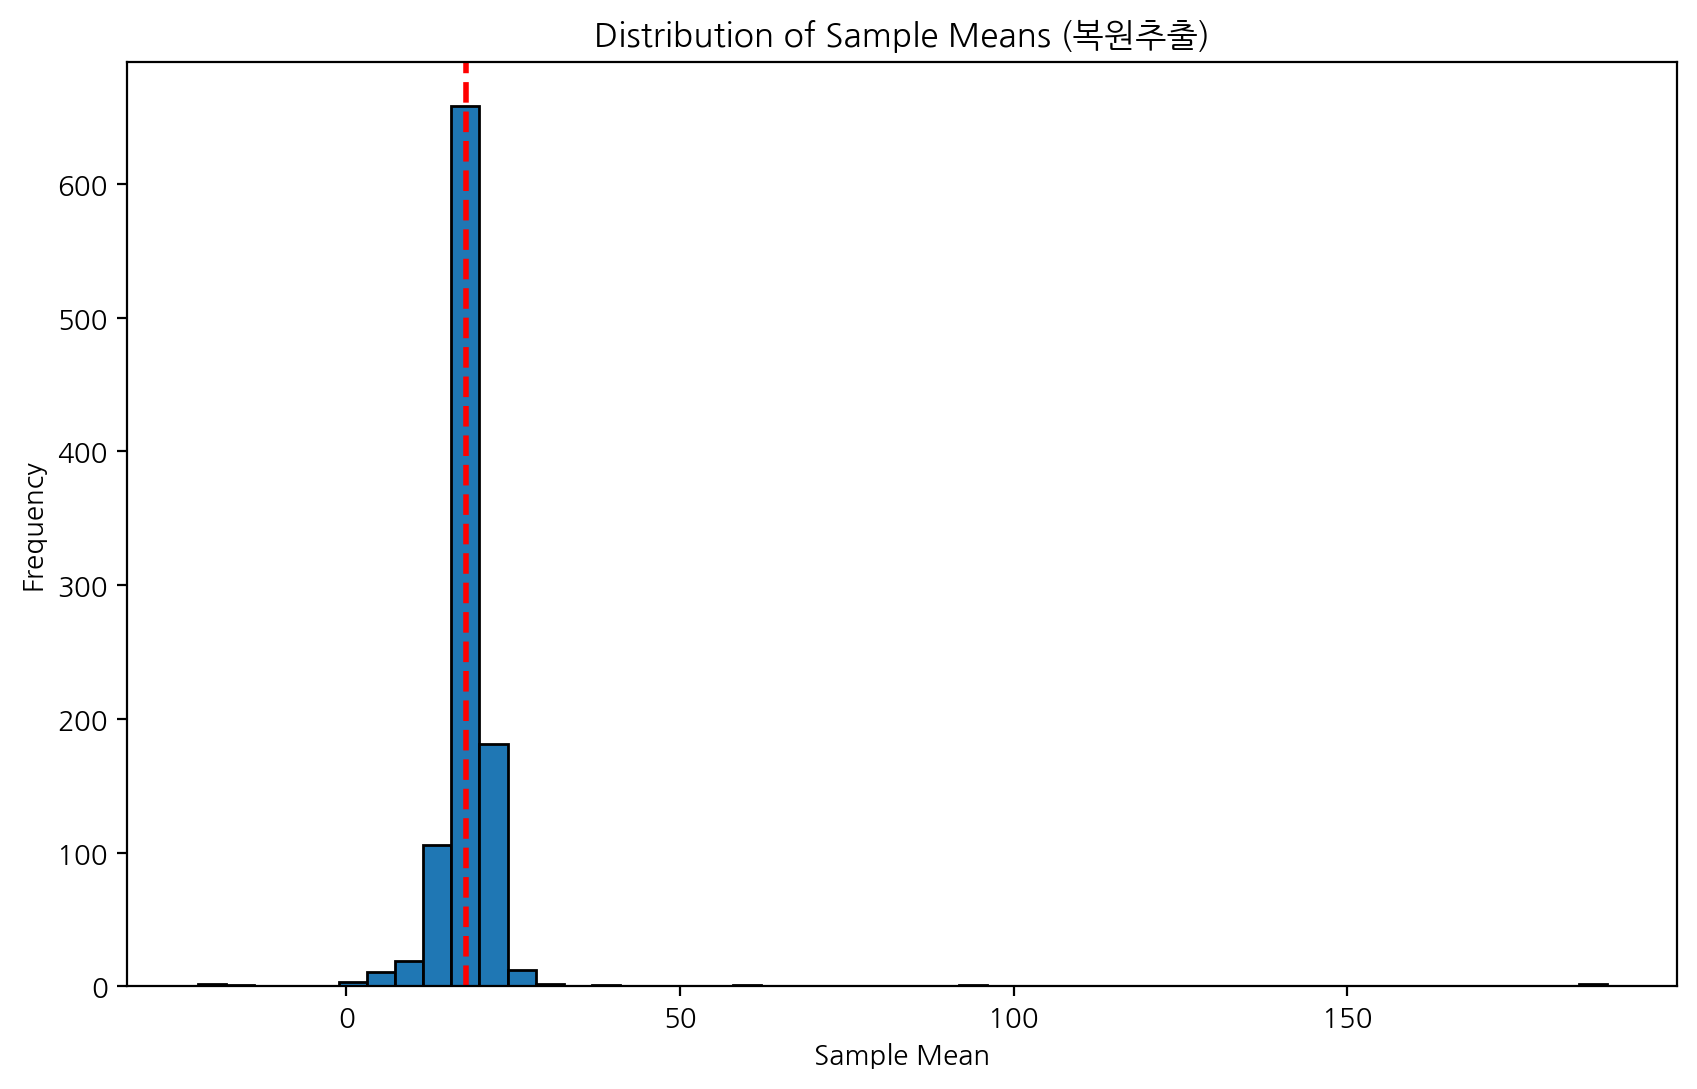

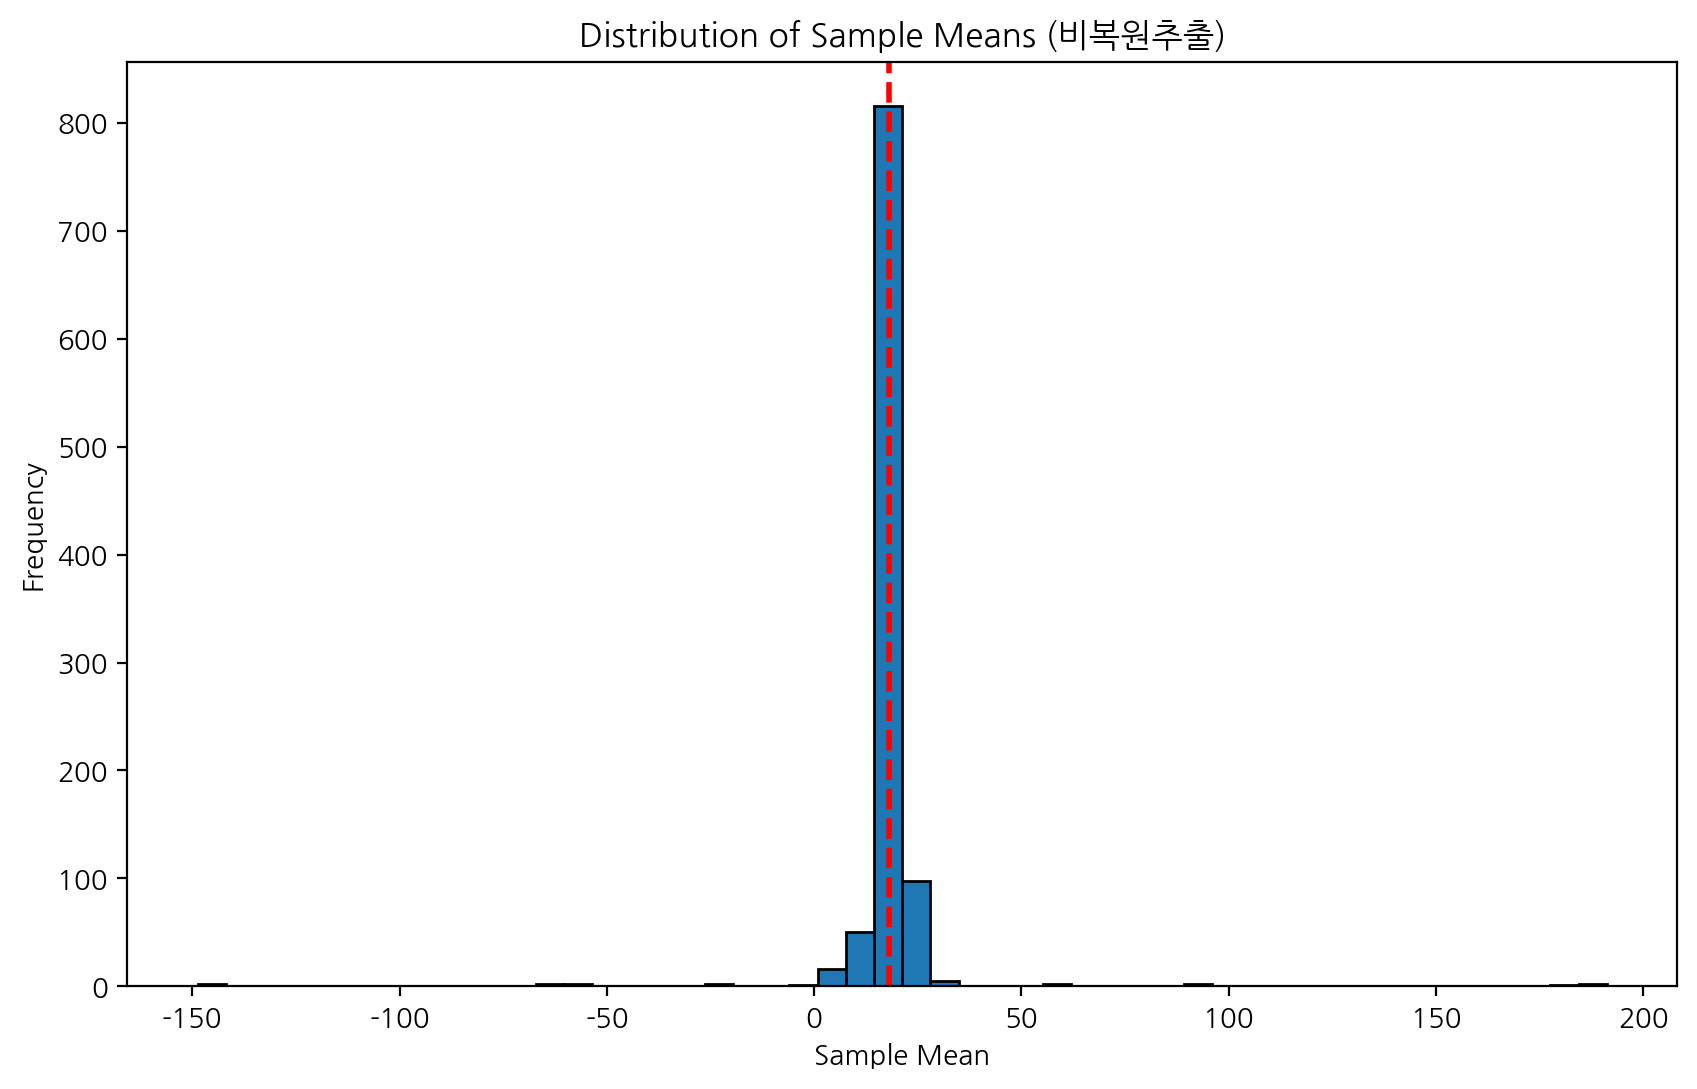

Mean of sample means: 18.02
Standard deviation of sample means: 13.97
Theoretical standard error: 11.98


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

# 전체 데이터셋의 'TotalPrice' 통계
population_mean = df['TotalPrice'].mean()
population_std = df['TotalPrice'].std()

# 1000개의 표본 추출
sample = df.sample(n=1000, random_state=42)
sample_mean = sample['TotalPrice'].mean()
sample_std = sample['TotalPrice'].std()

print(f"Population Mean: {population_mean:.2f}")
print(f"Population Std: {population_std:.2f}")
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Std: {sample_std:.2f}")

# 중심극한정리 시뮬레이션 (복원추출)
sample_means = []
for _ in range(1000):
    sample = df.sample(n=1000, replace=True)
    sample_means.append(sample['TotalPrice'].mean())

plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=50, edgecolor='black')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribution of Sample Means (복원추출)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

# 중심극한정리 시뮬레이션 (비복원추출)
sample_means = []
for _ in range(1000):
    sample = df.sample(n=1000)
    sample_means.append(sample['TotalPrice'].mean())

plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=50, edgecolor='black')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribution of Sample Means (비복원추출)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

print(f"Mean of sample means: {np.mean(sample_means):.2f}")
print(f"Standard deviation of sample means: {np.std(sample_means):.2f}")
print(f"Theoretical standard error: {population_std / np.sqrt(1000):.2f}")


# 결과 해석
# 표본은 더 큰 데이터 집합으로부터 얻은 데이터의 부분집합이고 큰 데이터 집합은 모집단
# 모집단이 정규분포가 아니더라도, 표본크기가 충분하고 데이터가 정규성을 크게 이탈하지 않는 경우, 여러 표본에서 추출한 평균은 종 모양의 정규곡선을 따름( = 중심극한정리)

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [7]:
import pandas as pd
import numpy as np
from scipy import stats

print(df[['TotalPrice', 'Country']].head())

top_countries = df['Country'].value_counts().nlargest(2).index.tolist()
print(f"Top 2 countries: {top_countries}")

country1 = top_countries[0]
country2 = top_countries[1]

prices1 = df[df['Country'] == country1]['TotalPrice']
prices2 = df[df['Country'] == country2]['TotalPrice']

mean1 = prices1.mean()
mean2 = prices2.mean()

print(f"{country1} mean TotalPrice: {mean1:.2f}")
print(f"{country2} mean TotalPrice: {mean2:.2f}")

t_stat, p_value = stats.ttest_ind(prices1, prices2, equal_var=False)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


# 가설 설정:
# 귀무가설(H0): 두 국가의 TotalPrice 평균에 차이가 없다.
# 대립가설(H1): 두 국가의 TotalPrice 평균에 차이가 있다.

# 결과 해석:
# p-value가 0.05보다 커서 귀무가설을 기각할 수 없으며, 두 국가의 TotalPrice 평균에 유의미한 차이가 없습니다.


# 1종 오류와 2종 오류
# 1종 오류 (Type I Error):
# 실제로는 귀무가설이 참인데 이를 기각하는 오류
# 이 경우: 실제로는 두 국가의 TotalPrice 평균에 차이가 없는데, 차이가 있다고 잘못 결론 내리는 것
# 유의수준(일반적으로 0.05)이 1종 오류를 범할 확률의 상한

# 2종 오류 (Type II Error):
# 실제로는 대립가설이 참인데 귀무가설을 기각하지 못하는 오류
# 이 경우: 실제로는 두 국가의 TotalPrice 평균에 차이가 있는데, 차이가 없다고 잘못 결론 내리는 것
# 검정력(1 - β)을 높임으로써 2종 오류 확률을 줄일 수 있음



from scipy import stats

def bootstrap_mean_diff(sample1, sample2, num_iterations=10000):
    combined = np.concatenate([sample1, sample2])
    mean_diffs = []
    n1, n2 = len(sample1), len(sample2)
    for _ in range(num_iterations):
        boot_sample = np.random.choice(combined, size=n1+n2, replace=True)
        boot_sample1 = boot_sample[:n1]
        boot_sample2 = boot_sample[n1:]
        mean_diff = np.mean(boot_sample1) - np.mean(boot_sample2)
        mean_diffs.append(mean_diff)
    return mean_diffs

# 재표본 검정 수행
boot_diffs = bootstrap_mean_diff(prices1, prices2)

# 신뢰구간 계산
ci_lower, ci_upper = np.percentile(boot_diffs, [2.5, 97.5])

print(f"Bootstrap 95% CI: ({ci_lower:.2f}, {ci_upper:.2f})")

# 관측된 평균 차이가 0인지 검정
observed_diff = np.mean(prices1) - np.mean(prices2)
p_value_boot = np.mean(np.abs(boot_diffs) >= np.abs(observed_diff))

print(f"Bootstrap p-value: {p_value_boot:.4f}")


   TotalPrice         Country
0       15.30  United Kingdom
1       20.34  United Kingdom
2       22.00  United Kingdom
3       20.34  United Kingdom
4       20.34  United Kingdom
Top 2 countries: ['United Kingdom', 'Germany']
United Kingdom mean TotalPrice: 16.53
Germany mean TotalPrice: 23.35
t-statistic: -10.046360185819829
p-value: 9.823416115791871e-24
Bootstrap 95% CI: (-8.41, 8.44)
Bootstrap p-value: 0.0684


## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. \
다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

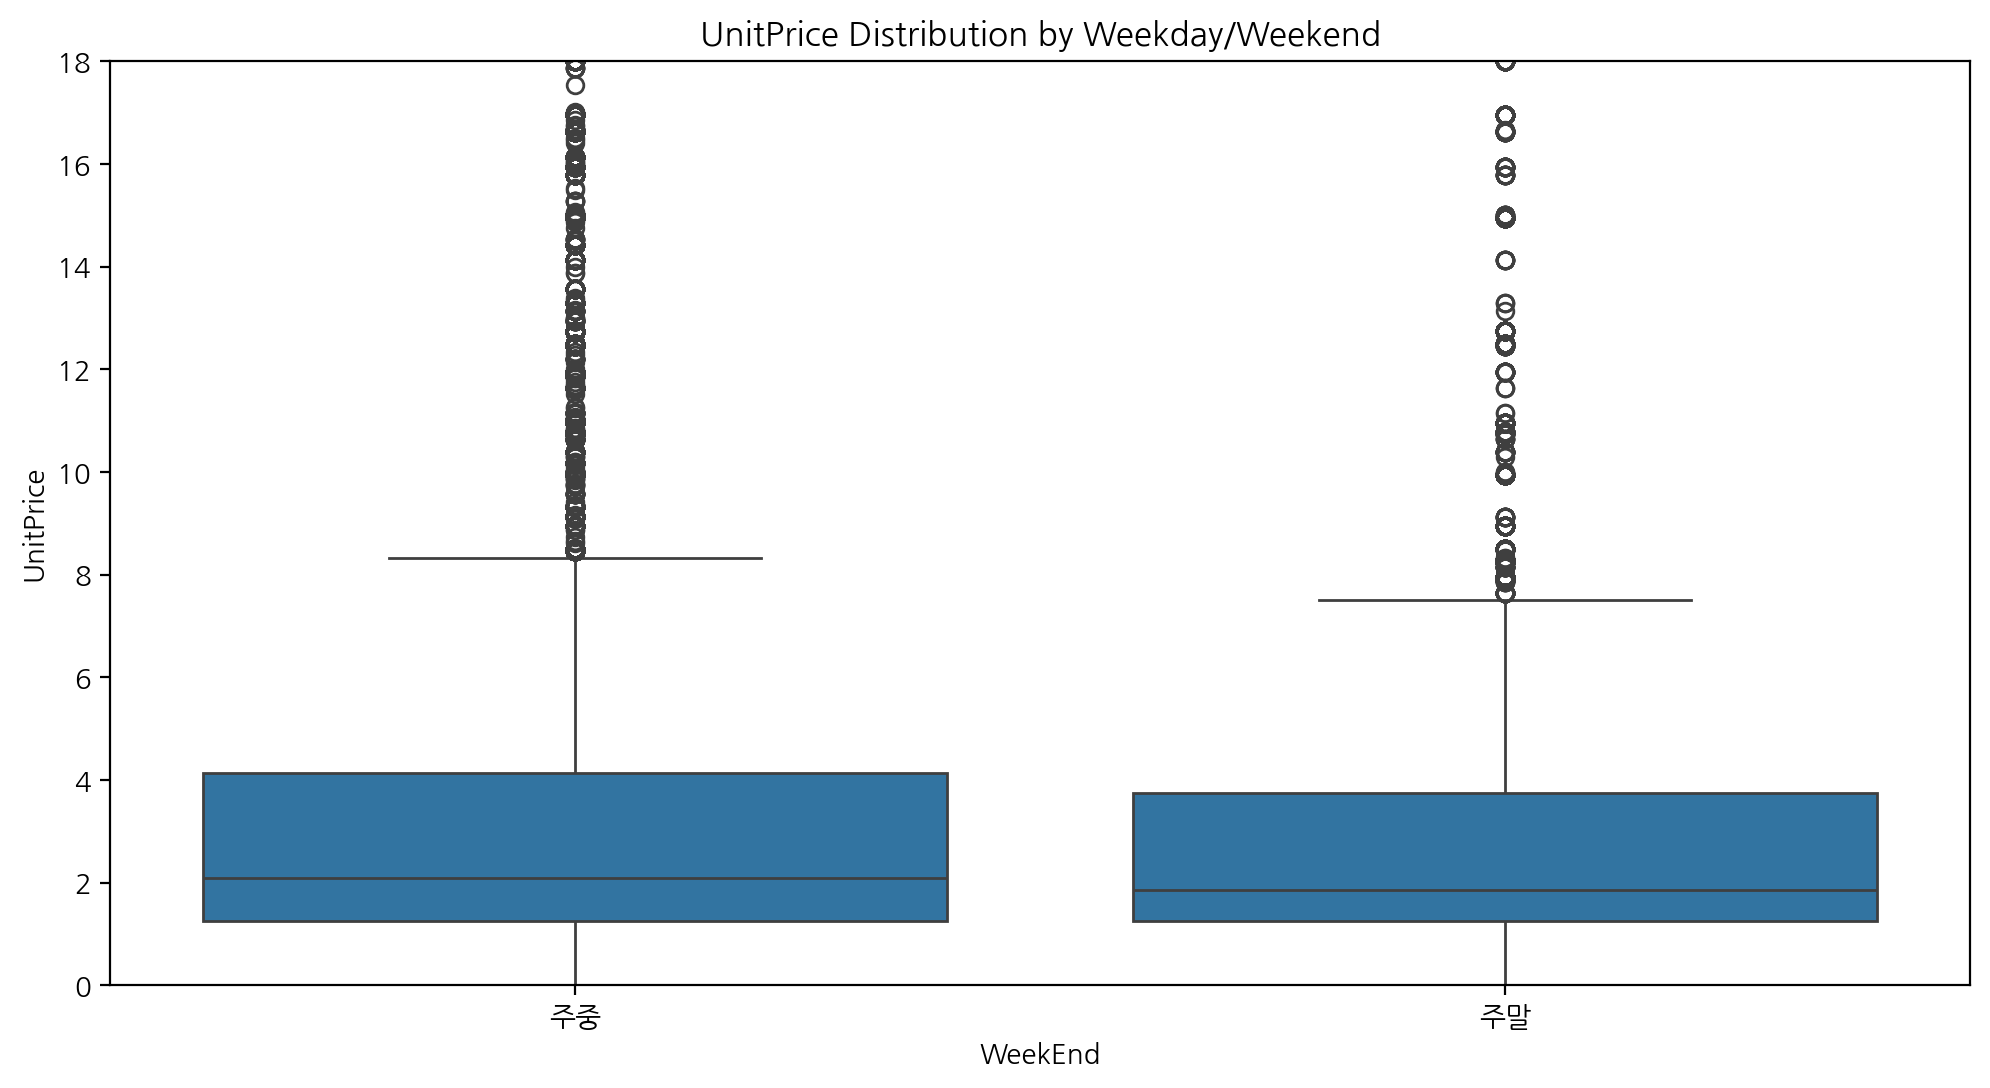

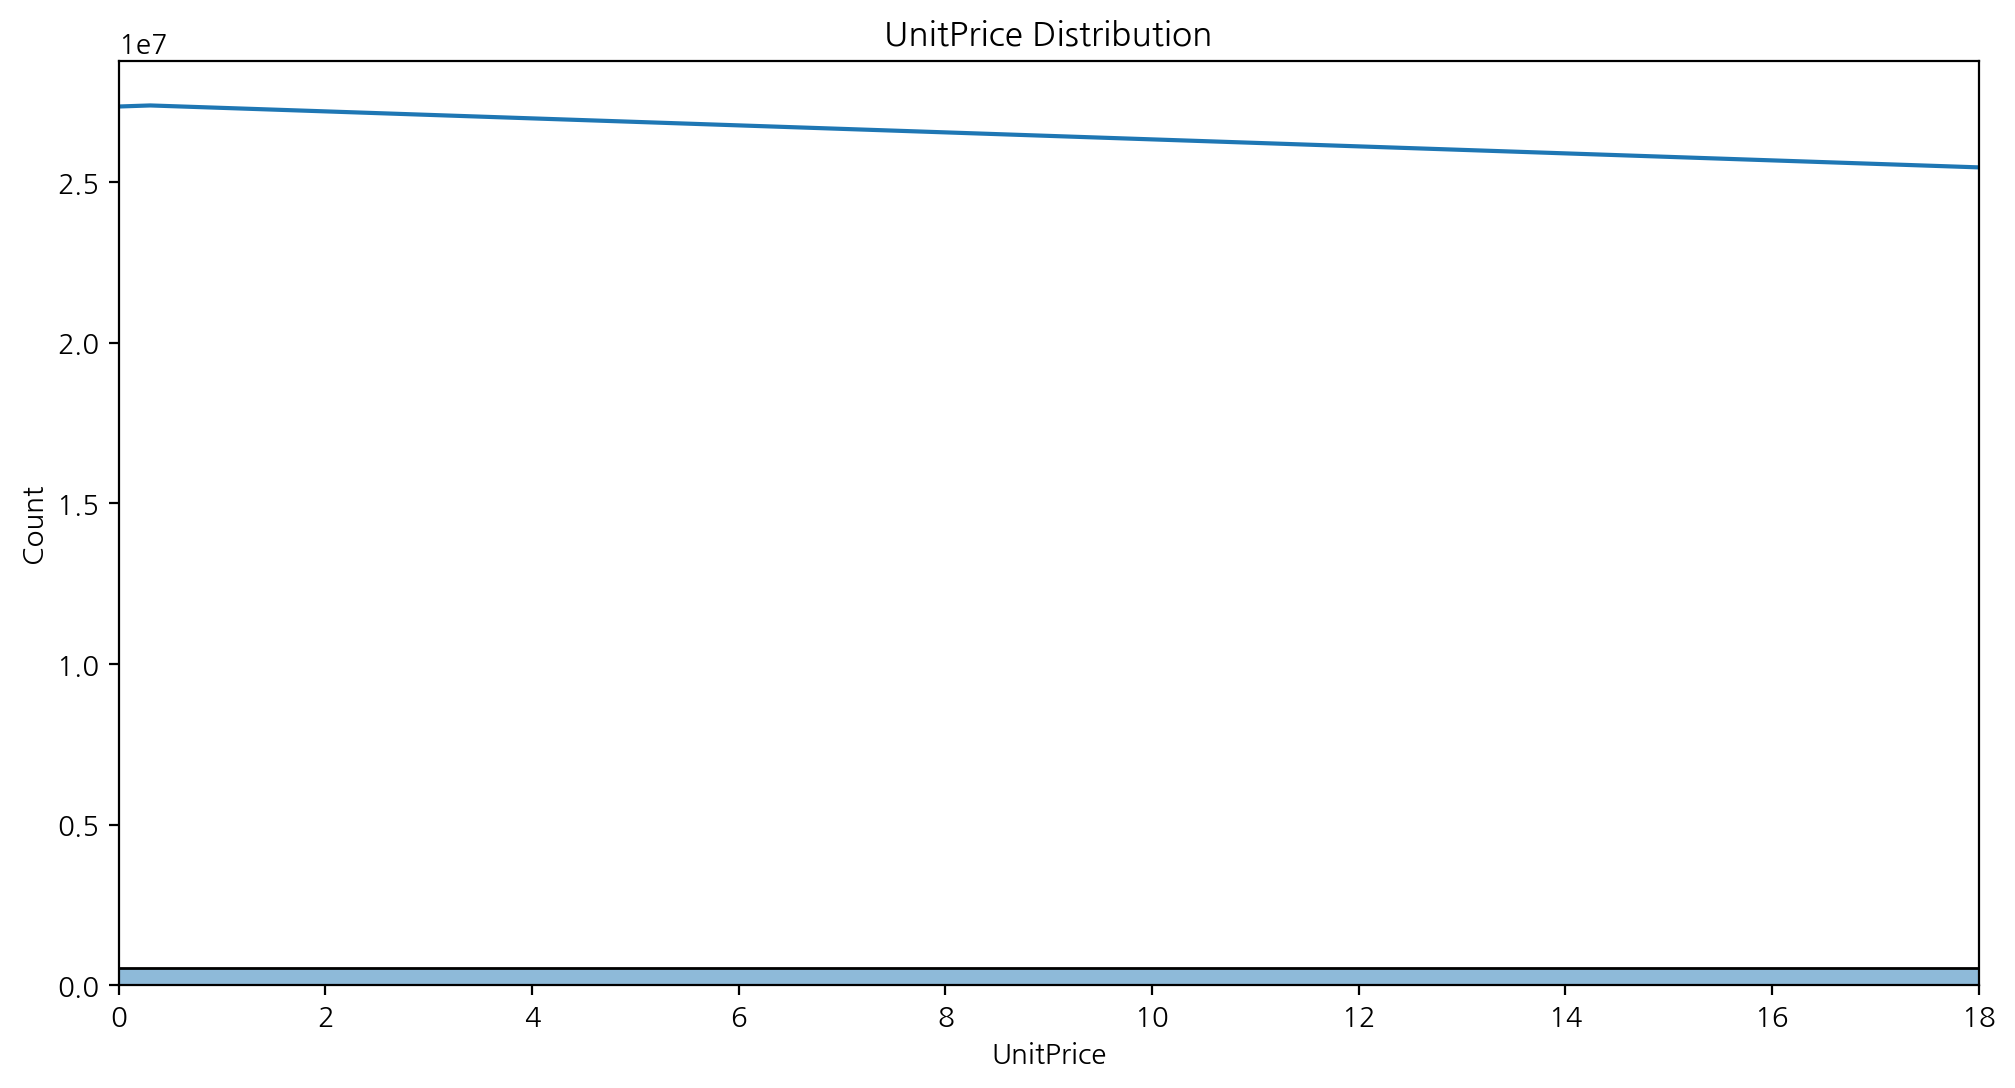

UnitPrice Statistics:
count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

Variance: 9362.47

Weekday UnitPrice Statistics:
count    477534.000000
mean          4.843425
std         103.032058
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

Weekend UnitPrice Statistics:
count    64375.000000
mean         2.887824
std          7.959497
min          0.000000
25%          1.250000
50%          1.850000
75%          3.750000
max       1236.750000
Name: UnitPrice, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

# 1. 상자수염그림
plt.figure(figsize=(12, 6))
sns.boxplot(x='WeekEnd', y='UnitPrice', data=df)
plt.title('UnitPrice Distribution by Weekday/Weekend')
plt.ylim(0, df['UnitPrice'].quantile(0.99))  # 상위 1% 제외
plt.show()

# 2. 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('UnitPrice Distribution')
plt.xlim(0, df['UnitPrice'].quantile(0.99))  # 상위 1% 제외
plt.show()

# 3. 주요 통계량 계산
stats = df['UnitPrice'].describe()
print("UnitPrice Statistics:")
print(stats)

variance = df['UnitPrice'].var()
print(f"\nVariance: {variance:.2f}")

# 4. 주중/주말 별 통계량
weekday_stats = weekday_data['UnitPrice'].describe()
weekend_stats = weekend_data['UnitPrice'].describe()

print("\nWeekday UnitPrice Statistics:")
print(weekday_stats)

print("\nWeekend UnitPrice Statistics:")
print(weekend_stats)


# 결과 해석
# 'UnitPrice Statistics':
# 평균 가격은 4.61입니다.
# 표준편차는 96.76으로, 가격의 변동성이 매우 큽니다.
# 최소값은 -11,062.06이고, 최대값은 38,970입니다. 음수 가격은 데이터 오류나 환불을 나타낼 수 있습니다.
# 중앙값(50% 분위수)은 2.08로, 평균보다 훨씬 낮습니다. 이는 분포가 오른쪽으로 크게 치우쳐 있음을 의미합니다.
# 분산은 9,362.47로 매우 큽니다. 이는 가격의 변동성이 매우 높다는 것을 나타냅니다.

# 'Weekday UnitPrice Statistics':
# 평균 가격(4.84)은 전체 평균보다 약간 높습니다.
# 표준편차(103.03)도 전체보다 높아, 평일의 가격 변동성이 더 큽니다.
# 최소값과 최대값은 전체 데이터와 동일합니다.

# 'Weekend UnitPrice Statistics':
# 평균 가격(2.89)은 전체 및 평일 평균보다 낮습니다.
# 표준편차(7.96)는 전체 및 평일보다 훨씬 낮아, 주말의 가격 변동성이 상대적으로 작습니다.
# 최소값은 0이고, 최대값은 1,236.75로 평일보다 범위가 좁습니다.



## 미션4) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
이를 이용해 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```

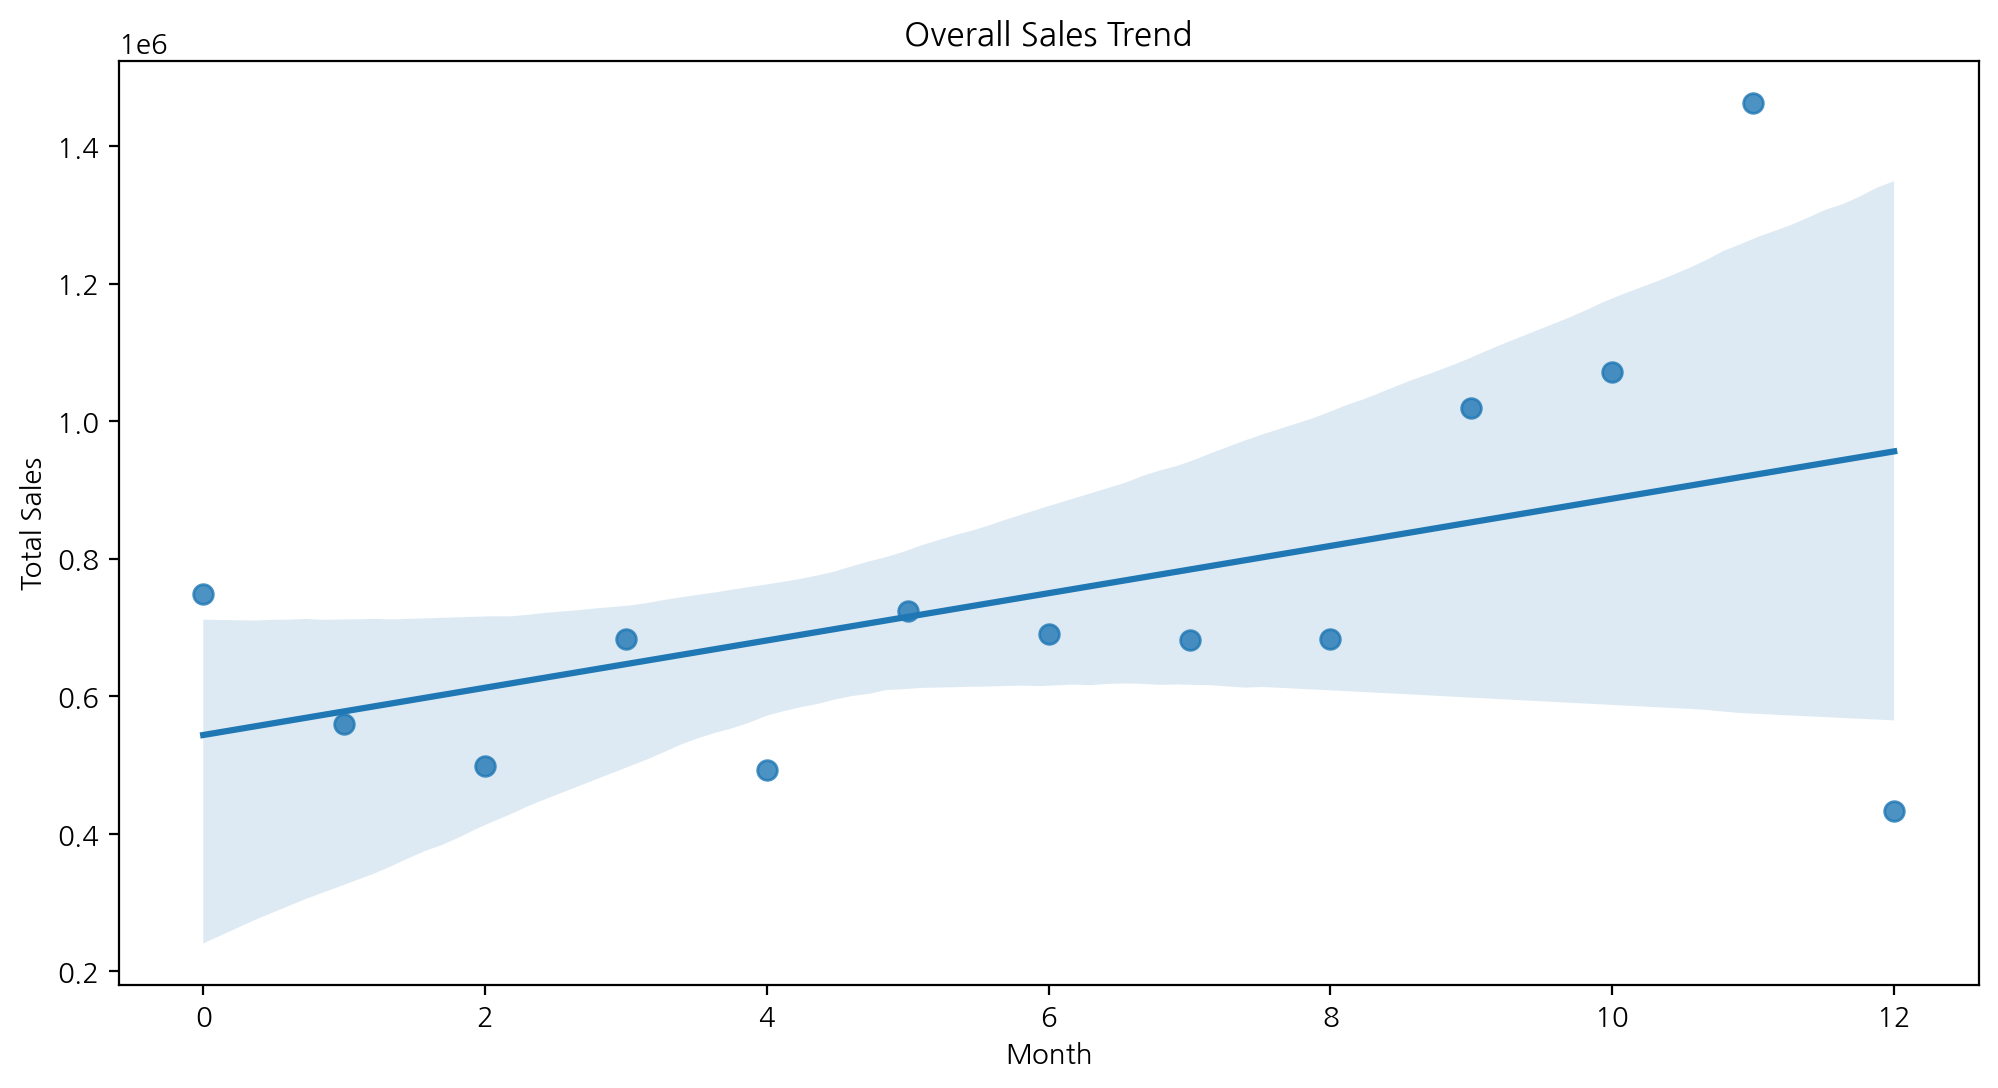

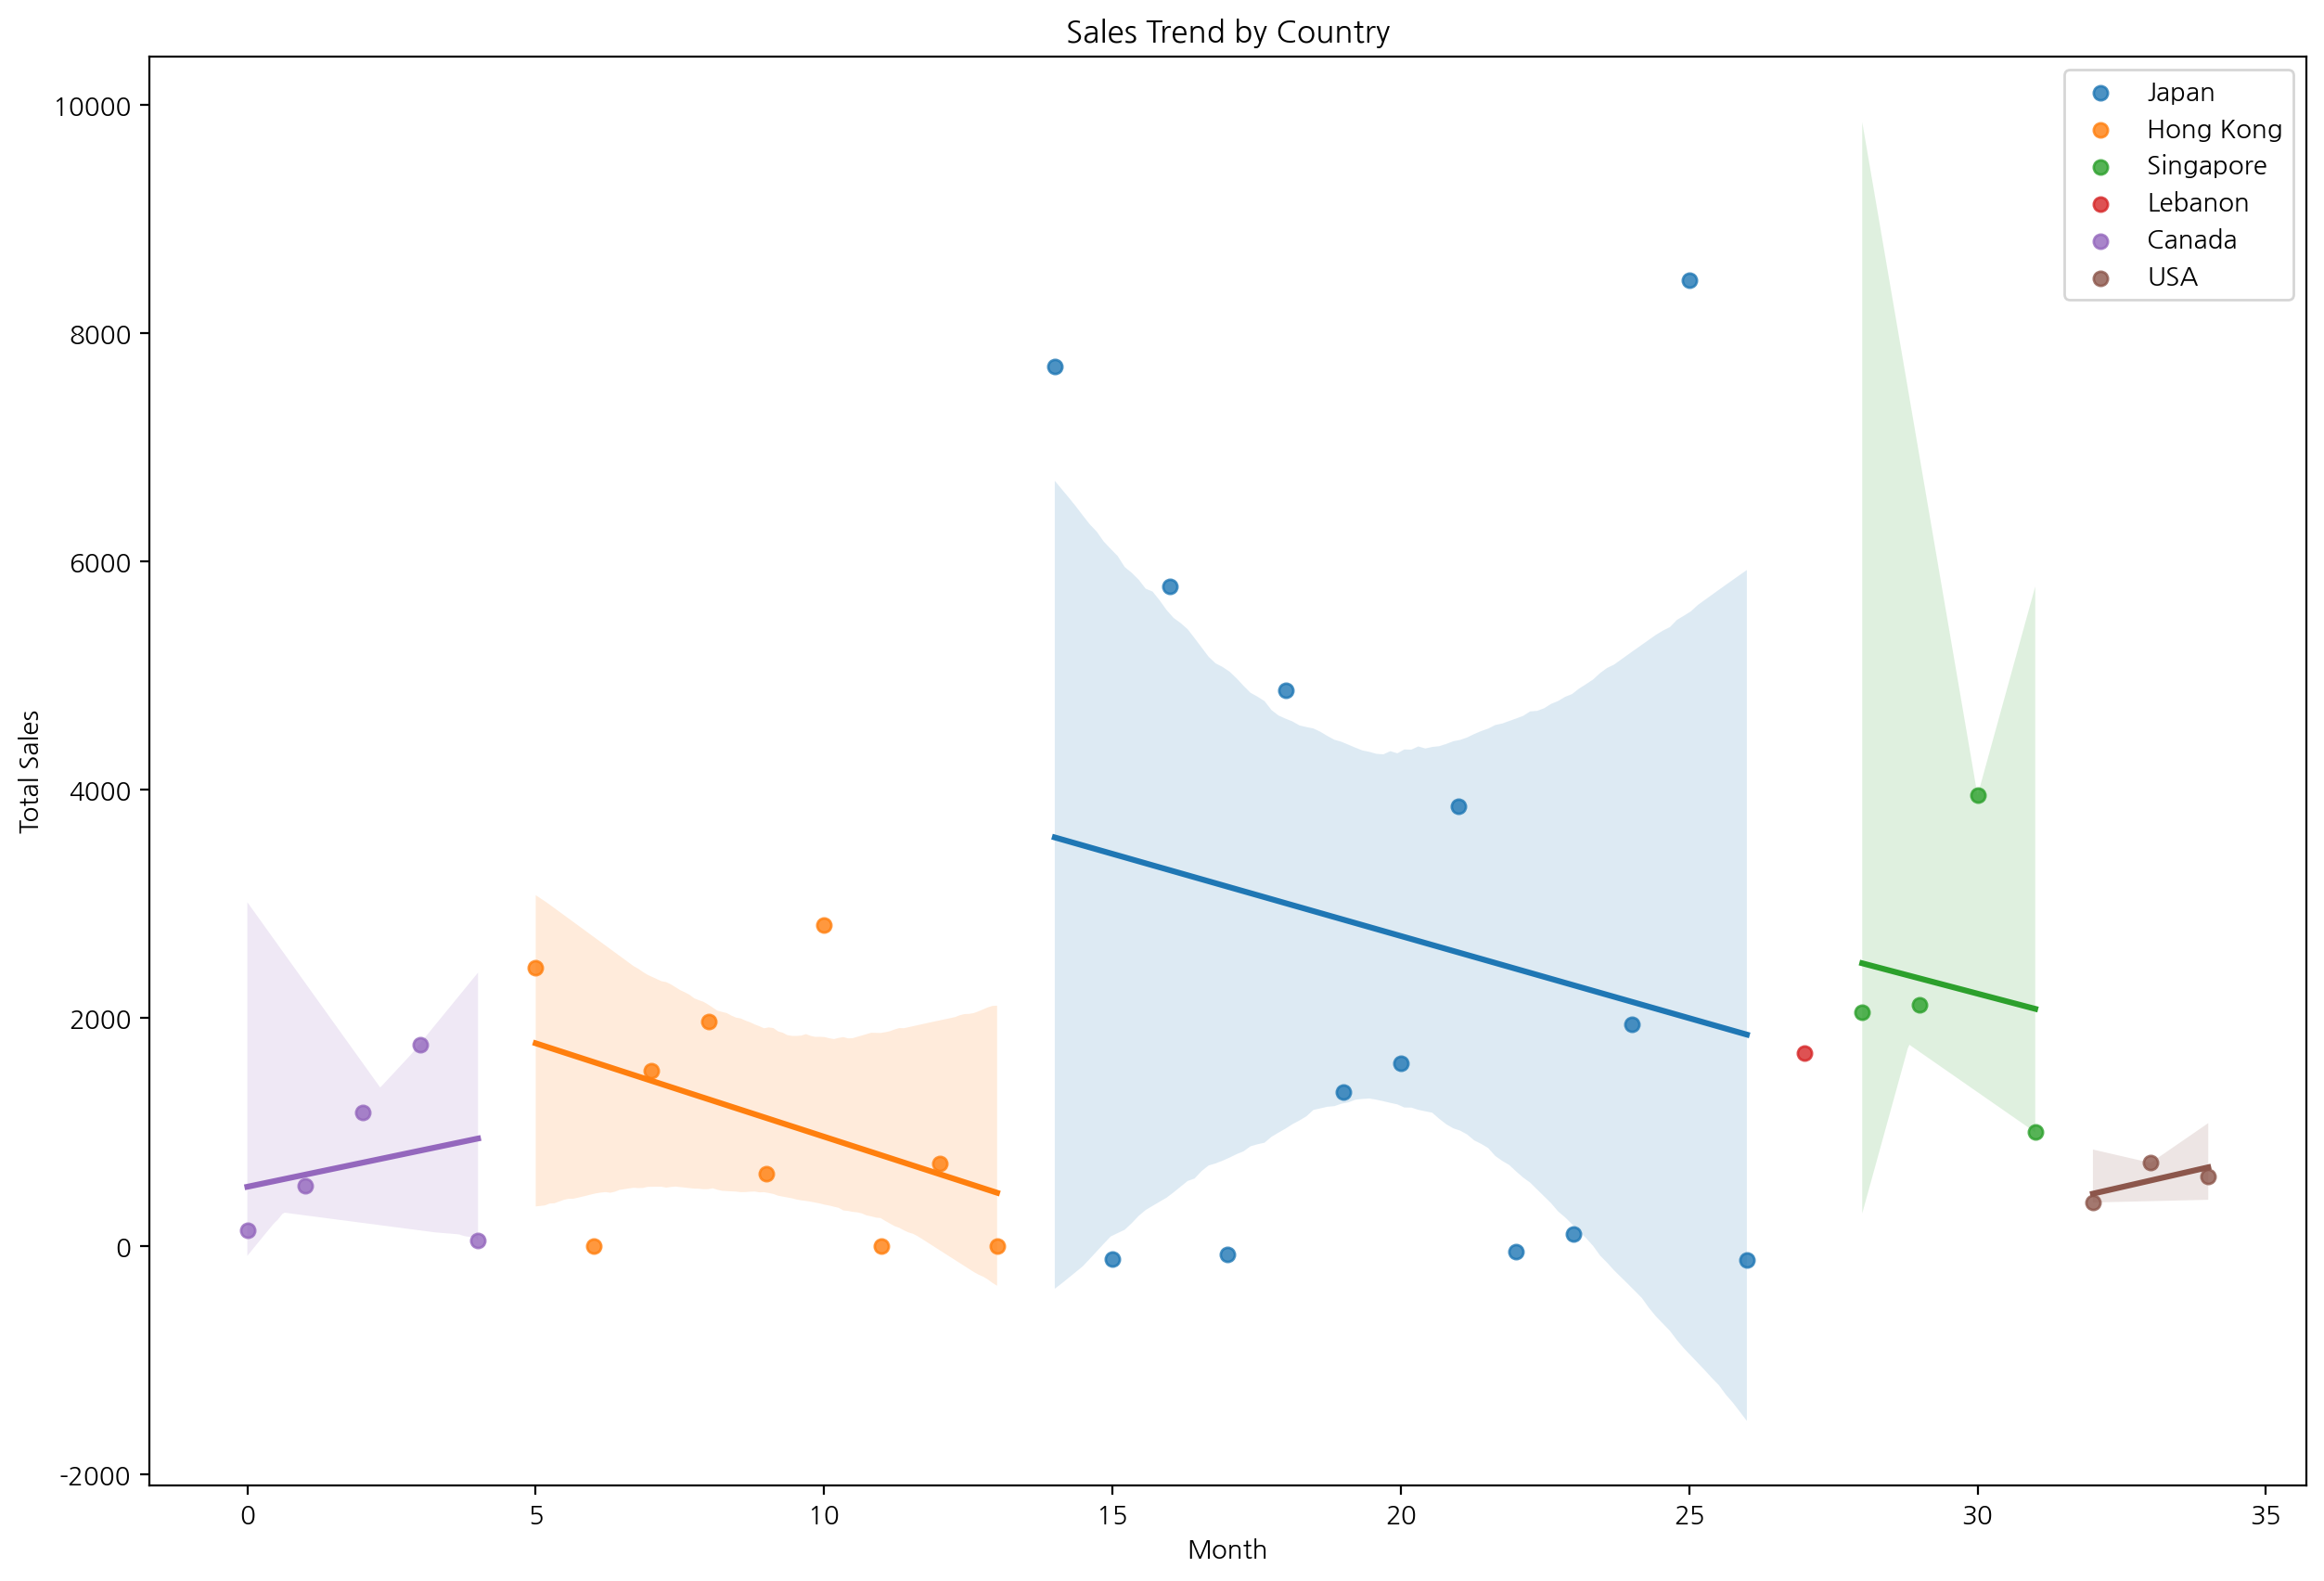

Overall correlation: 0.4717
Japan correlation: nan
Hong Kong correlation: 0.0145
Singapore correlation: nan
Lebanon correlation: nan
Canada correlation: 0.2295
USA correlation: nan


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

# 전체 및 국가별 월간 총 판매금액 계산
total_sales = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()
country_sales = df[df['Country'].isin(country_group)].groupby(['Country', 'YearMonth'])['TotalPrice'].sum().reset_index()

# 전체 추세 시각화
plt.figure(figsize=(12, 6))
sns.regplot(x=total_sales.index, y='TotalPrice', data=total_sales, scatter_kws={'s': 50})
plt.title('Overall Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# 국가별 추세 시각화
plt.figure(figsize=(15, 10))
for country in country_group:
    country_data = country_sales[country_sales['Country'] == country]
    sns.regplot(x=country_data.index, y='TotalPrice', data=country_data, label=country, scatter_kws={'s': 30})

plt.title('Sales Trend by Country')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# 상관계수 계산
overall_corr = total_sales['TotalPrice'].corr(pd.Series(range(len(total_sales))))
print(f"Overall correlation: {overall_corr:.4f}")

for country in country_group:
    country_data = country_sales[country_sales['Country'] == country]
    corr = country_data['TotalPrice'].corr(pd.Series(range(len(country_data))))
    print(f"{country} correlation: {corr:.4f}")


# 결과 해석
# 전체 판매 추세 (Image 1):
# 전반적으로 상승하는 추세를 보이고 있습니다. 이는 비즈니스가 성장하고 있음을 시사합니다.
# 계절성이 관찰됩니다. 특히 11-12월경(월 10-11)에 판매가 급증하는 것으로 보아 연말 시즌에 수요가 높아짐을 알 수 있습니다.

# 국가별 판매 추세 (Image 2):
# 일본이 가장 높은 판매량을 보이지만, 하락 추세에 있습니다.
# 홍콩도 하락 추세를 보입니다.
# 싱가포르, 레바논, 캐나다, 미국은 상대적으로 안정적이거나 약간의 상승세를 보입니다.

# 비즈니스 활용 방안:
# 시즌별 전략:
# 연말 시즌(11-12월)에 맞춘 특별 프로모션과 재고 확대를 계획합니다.
# 상대적으로 판매가 낮은 시기에는 신제품 출시나 마케팅 캠페인을 통해 판매를 촉진합니다.


## 미션5) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalPrice)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 결측치 제거
df_clean = df.dropna(subset=['UnitPrice', 'TotalPrice'])
df_clean.isnull().sum()

InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
InvoiceMonth         0
TotalPrice           0
DayOfWeek            0
WeekEnd              0
YearMonth            0
dtype: int64

           UnitPrice     TotalPrice
count  532371.000000  532371.000000
mean        3.068502      13.660587
std        21.656209     256.471544
min    -11062.060000 -168469.600000
25%         1.250000       3.360000
50%         2.080000       8.850000
75%         4.130000      17.000000
max        18.000000     180.000000
회귀계수 (기울기): 1.0041327210822513
절편: 10.579403015456496
결정계수 (R-squared): 0.007189004464578486


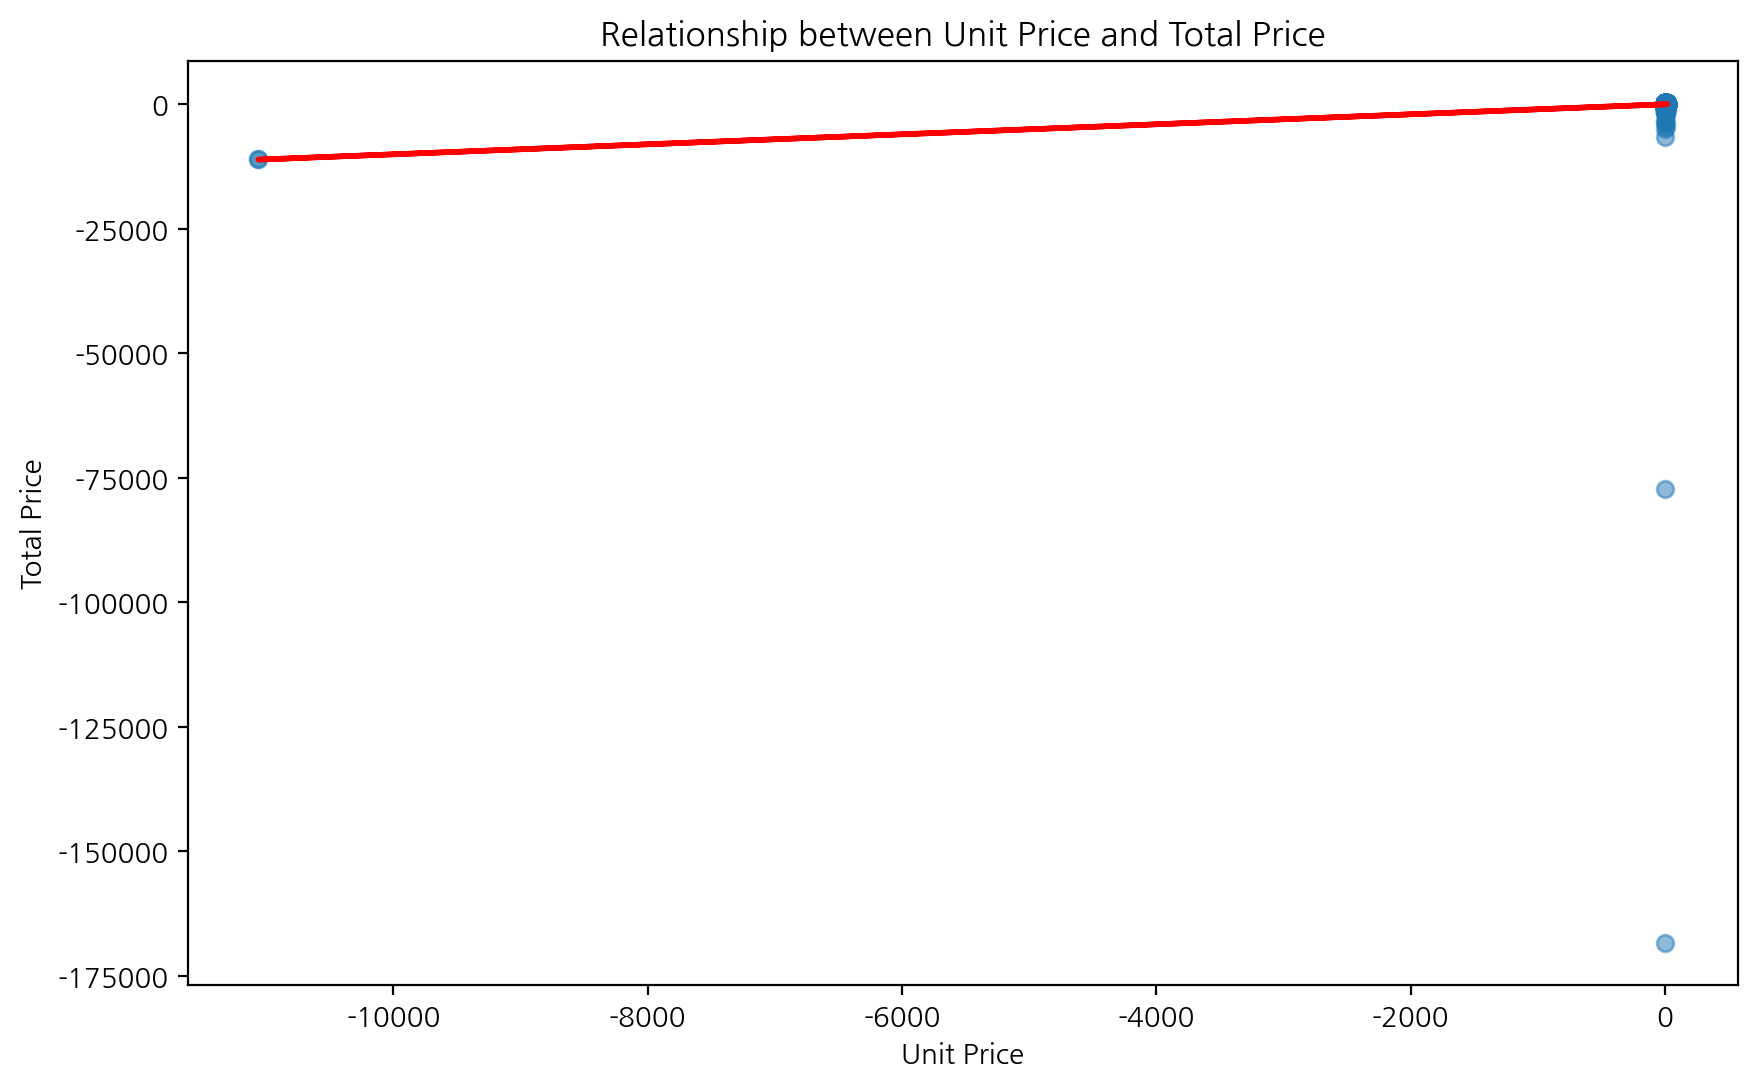

In [11]:
# 극단값 제거 (상위 1% 제외)
unit_price_threshold = df_clean['UnitPrice'].quantile(0.99)
total_price_threshold = df_clean['TotalPrice'].quantile(0.99)
df_clean = df_clean[(df_clean['UnitPrice'] <= unit_price_threshold) &
                    (df_clean['TotalPrice'] <= total_price_threshold)]

# 데이터 확인
print(df_clean[['UnitPrice', 'TotalPrice']].describe())

# 변수 설정
X = df_clean['UnitPrice'].values.reshape(-1, 1)
y = df_clean['TotalPrice'].values

# 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 결과 출력
print("회귀계수 (기울기):", model.coef_[0])
print("절편:", model.intercept_)
print("결정계수 (R-squared):", r2_score(y, y_pred))

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Unit Price')
plt.ylabel('Total Price')
plt.title('Relationship between Unit Price and Total Price')
plt.show()


# 결과 해석
# 회귀계수 (기울기): 1.0041327210822513
# 이 값은 UnitPrice가 1단위 증가할 때 TotalPrice가 평균적으로 얼마나 증가하는지를 나타냅니다.
# 여기서는 UnitPrice가 1단위 증가할 때, TotalPrice가 평균적으로 약 1.004 단위 증가한다는 의미입니다.
# 이는 양의 상관관계를 나타내며, UnitPrice와 TotalPrice가 거의 1:1로 증가함을 보여줍니다.

# 절편: 10.579403015456496
# 이 값은 UnitPrice가 0일 때의 예측된 TotalPrice 값입니다.
# 즉, 다른 모든 조건이 동일할 때, 기본적으로 TotalPrice가 약 10.58의 값을 가진다는 의미입니다.

# 결정계수 (R-squared): 0.007189004464578486
# 이 값은 모델이 데이터의 변동성을 얼마나 잘 설명하는지를 나타냅니다.
# 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델의 설명력이 높습니다.
# 여기서는 약 0.0072로, 모델이 데이터의 변동성을 매우 적게 설명하고 있음을 의미합니다.
# 이는 UnitPrice만으로는 TotalPrice의 변동을 거의 설명하지 못한다는 것을 나타냅니다.


## 미션6) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

                                        count       mean        std     min  \
IsChristmasPeriod IsChristmasProduct                                          
False             False               22141.0  20.952693  82.522486 -1188.0   
                  True                 1575.0  13.712952  30.415875  -367.2   
True              False                3060.0  22.393742  49.516387 -1275.0   
                  True                   74.0   7.671486  26.051090   -41.7   

                                       25%   50%     75%     max  
IsChristmasPeriod IsChristmasProduct                              
False             False               3.75  10.2  19.500  3828.0  
                  True                2.95   7.8  16.500   425.0  
True              False               5.04  14.4  20.650   500.0  
                  True                1.25   4.6  10.425   127.5  


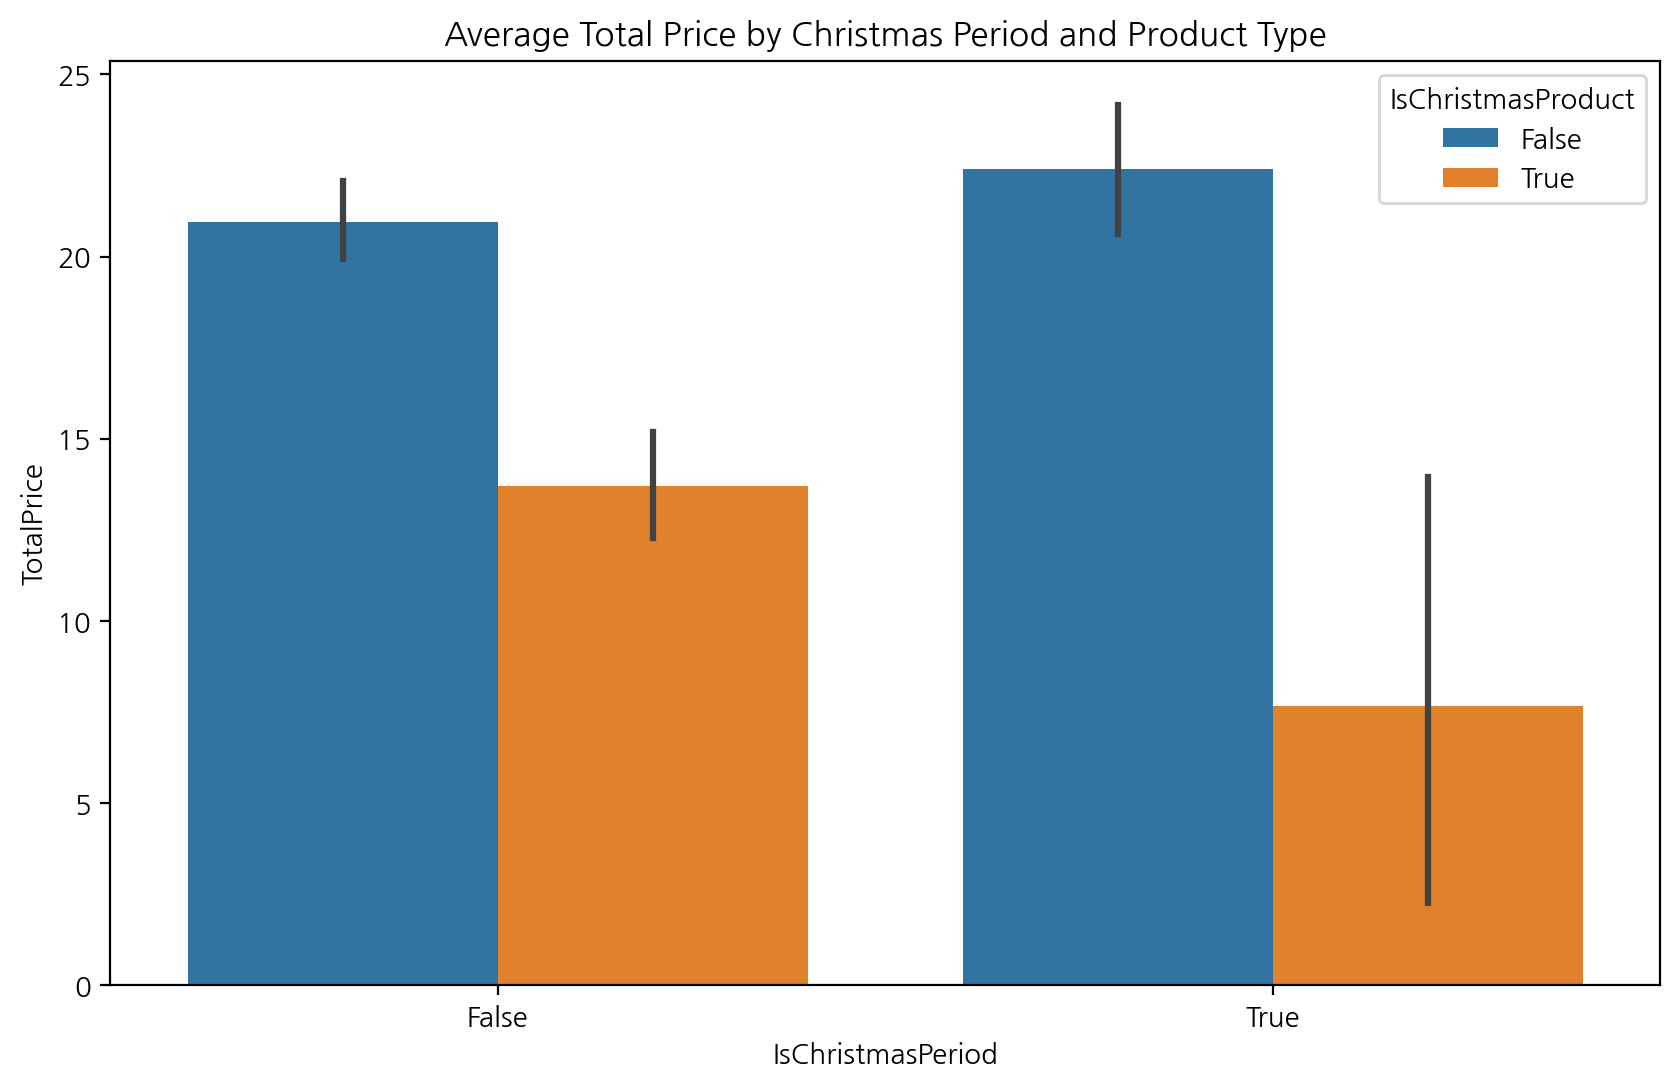

Difference-in-Differences Effect: -7.482514530908566
T-statistic: -3.919437458538123, p-value: 8.897597368823484e-05


<Figure size 1200x600 with 0 Axes>

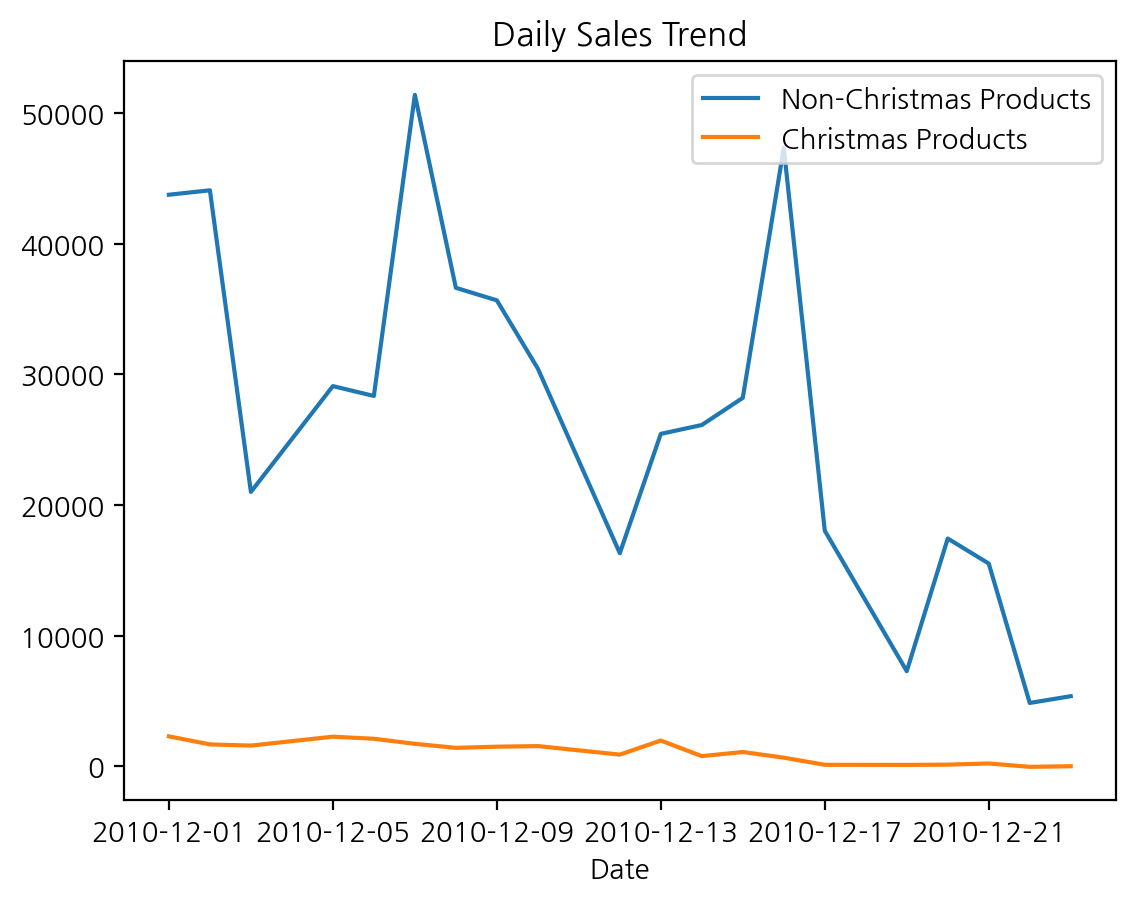

In [12]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 데이터 준비
df_promotion['TotalPrice'] = df_promotion['Quantity'] * df_promotion['UnitPrice']

# 기본 통계 확인
print(df_promotion.groupby(['IsChristmasPeriod', 'IsChristmasProduct'])['TotalPrice'].describe())

# 크리스마스 기간과 상품 여부에 따른 평균 판매액 비교
plt.figure(figsize=(10, 6))
sns.barplot(x='IsChristmasPeriod', y='TotalPrice', hue='IsChristmasProduct', data=df_promotion)
plt.title('Average Total Price by Christmas Period and Product Type')
plt.show()

# 이중차분법 적용 (인과 분석)
def diff_in_diff(data, period, treatment, outcome):
    treated = data[data[treatment] == True]
    control = data[data[treatment] == False]

    diff_treated = treated[treated[period] == True][outcome].mean() - treated[treated[period] == False][outcome].mean()
    diff_control = control[control[period] == True][outcome].mean() - control[control[period] == False][outcome].mean()

    return diff_treated - diff_control

did_effect = diff_in_diff(df_promotion, 'IsChristmasPeriod', 'IsChristmasProduct', 'TotalPrice')
print(f"Difference-in-Differences Effect: {did_effect}")

# t-검정 수행
christmas_product = df_promotion[df_promotion['IsChristmasProduct'] == True]['TotalPrice']
non_christmas_product = df_promotion[df_promotion['IsChristmasProduct'] == False]['TotalPrice']

t_stat, p_value = stats.ttest_ind(christmas_product, non_christmas_product)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

# 일별 판매량 추이 (시계열 분석)
df_promotion['Date'] = df_promotion['InvoiceDate'].dt.date
daily_sales = df_promotion.groupby(['Date', 'IsChristmasProduct'])['TotalPrice'].sum().unstack()

plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.legend(['Non-Christmas Products', 'Christmas Products'])
plt.show()


# 결과 해석
# 크리스마스 상품 vs 비크리스마스 상품:
# 그래프를 보면 크리스마스 상품의 판매량이 비크리스마스 상품에 비해 현저히 낮습니다.
# 그러나 크리스마스 기간 동안 크리스마스 상품의 판매가 소폭 증가하는 추세를 보입니다.

# 가격 전략:
# 크리스마스 상품의 평균 가격(중앙값 기준)이 비크리스마스 상품보다 낮습니다(크리스마스 기간 중 4.6 vs 14.4).
# 이는 크리스마스 상품에 대한 할인 전략이 적용되고 있음을 시사합니다.

# 이중차분(DID) 분석 결과:
# DID 효과가 -7.48로 나타났으며, 이는 통계적으로 유의미합니다(p-value < 0.05).
# 이는 크리스마스 기간 동안 크리스마스 상품의 판매가 예상보다 감소했음을 의미합니다.

# 권장 전략
# 크리스마스 상품 포트폴리오 개선:
# 현재 크리스마스 상품의 판매가 저조한 것으로 보입니다. 상품 라인업을 재검토하고 인기 있는 비크리스마스 상품의 특성을 분석하여 크리스마스 상품에 적용을 권장합니다.


## 미션7) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
from statsmodels.formula.api import ols

# ols.summary()를 이용해 볼 수 있습니다.
```

In [13]:
df_clean.value_counts()

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate          UnitPrice  CustomerID  Country         InvoiceMonth  TotalPrice  DayOfWeek  WeekEnd  YearMonth
555524     22698      PINK REGENCY TEACUP AND SAUCER        1        2011-06-05 11:37:00  2.95       16923.0     United Kingdom  6              2.95       6          주말       2011-06      20
           22697      GREEN REGENCY TEACUP AND SAUCER       1        2011-06-05 11:37:00  2.95       16923.0     United Kingdom  6              2.95       6          주말       2011-06      12
572861     22775      PURPLE DRAWERKNOB ACRYLIC EDWARDIAN   12       2011-10-26 12:46:00  1.25       14102.0     United Kingdom  10             15.00      2          주중       2011-10       8
572344     M          Manual                                48       2011-10-24 10:43:00  1.50       14607.0     United Kingdom  10             72.00      0          주중       2011-10       6
540524     21756      BATH BUILDING BLOCK WORD     

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-14-d53574f4c273>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Country'] = df_clean['Country'].astype('category')


생성된 더미 변수 열: ['Country_France', 'Country_Germany', 'Country_Spain', 'Country_United Kingdom']


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1734: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


                            OLS Regression Results                            
Dep. Variable:            LogQuantity   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 16 Jul 2024   Prob (F-statistic):                nan
Time:                        08:18:03   Log-Likelihood:                    nan
No. Observations:              508466   AIC:                               nan
Df Residuals:                  508459   BIC:                               nan
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

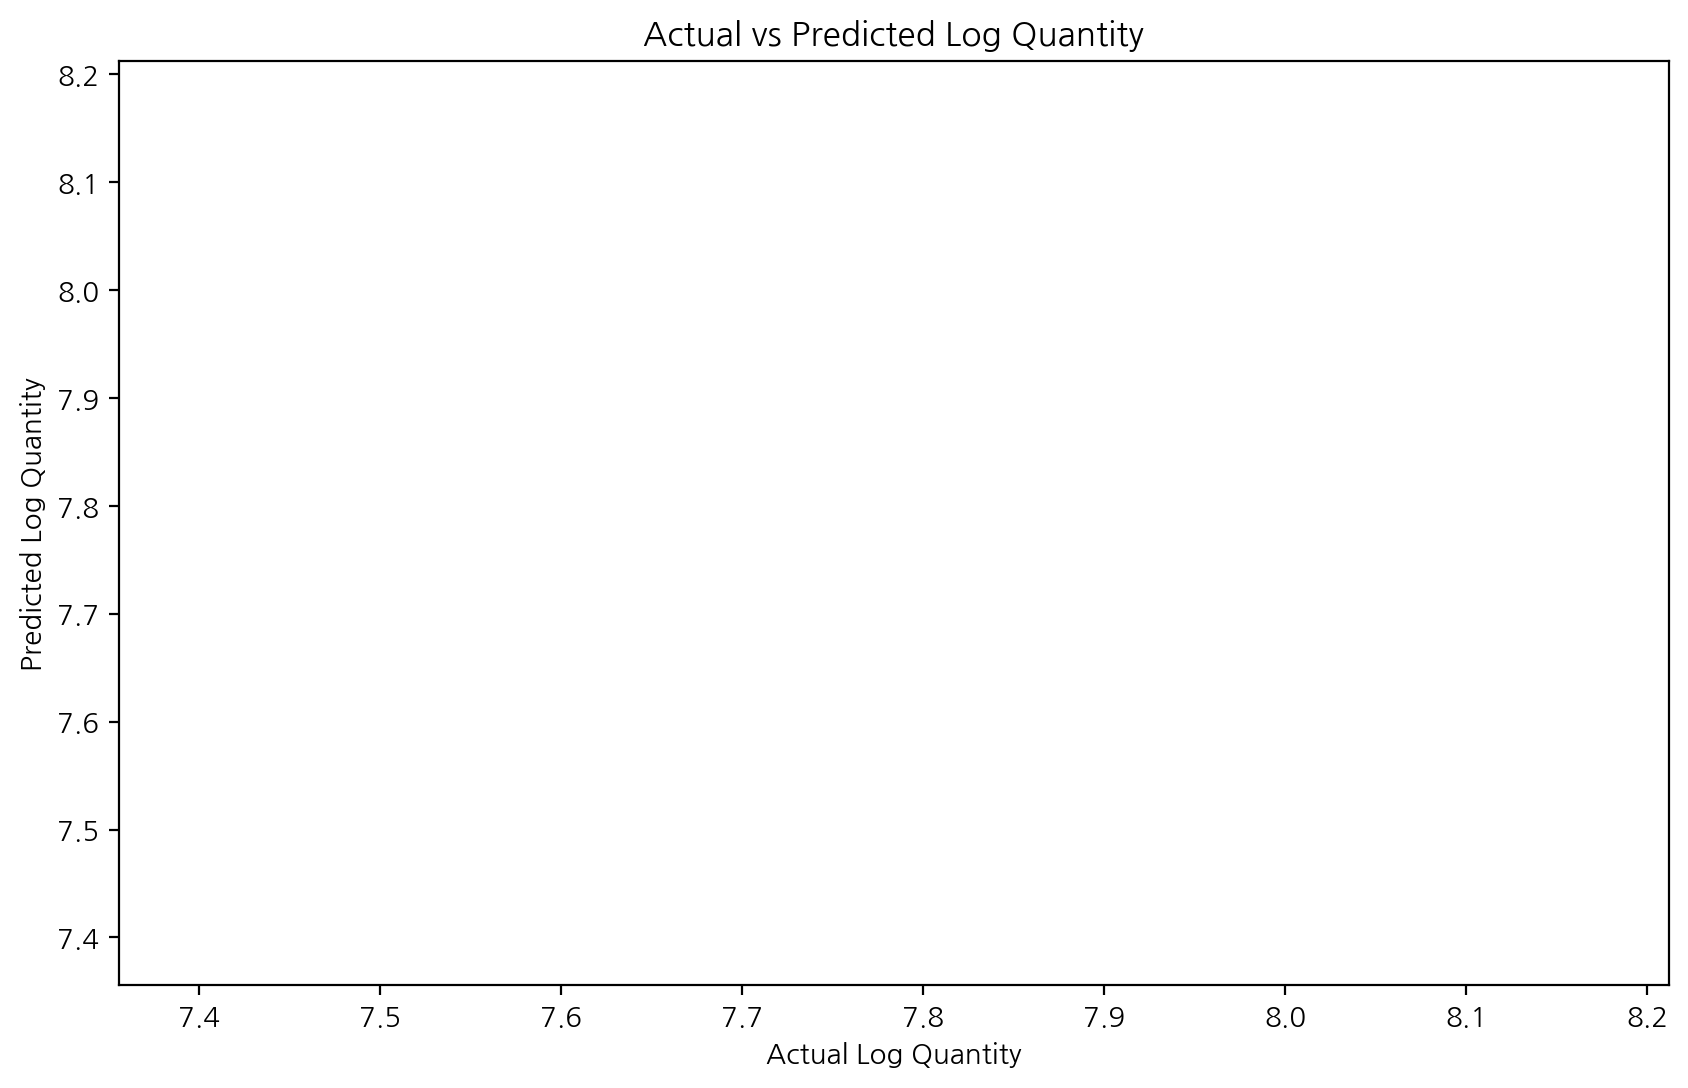

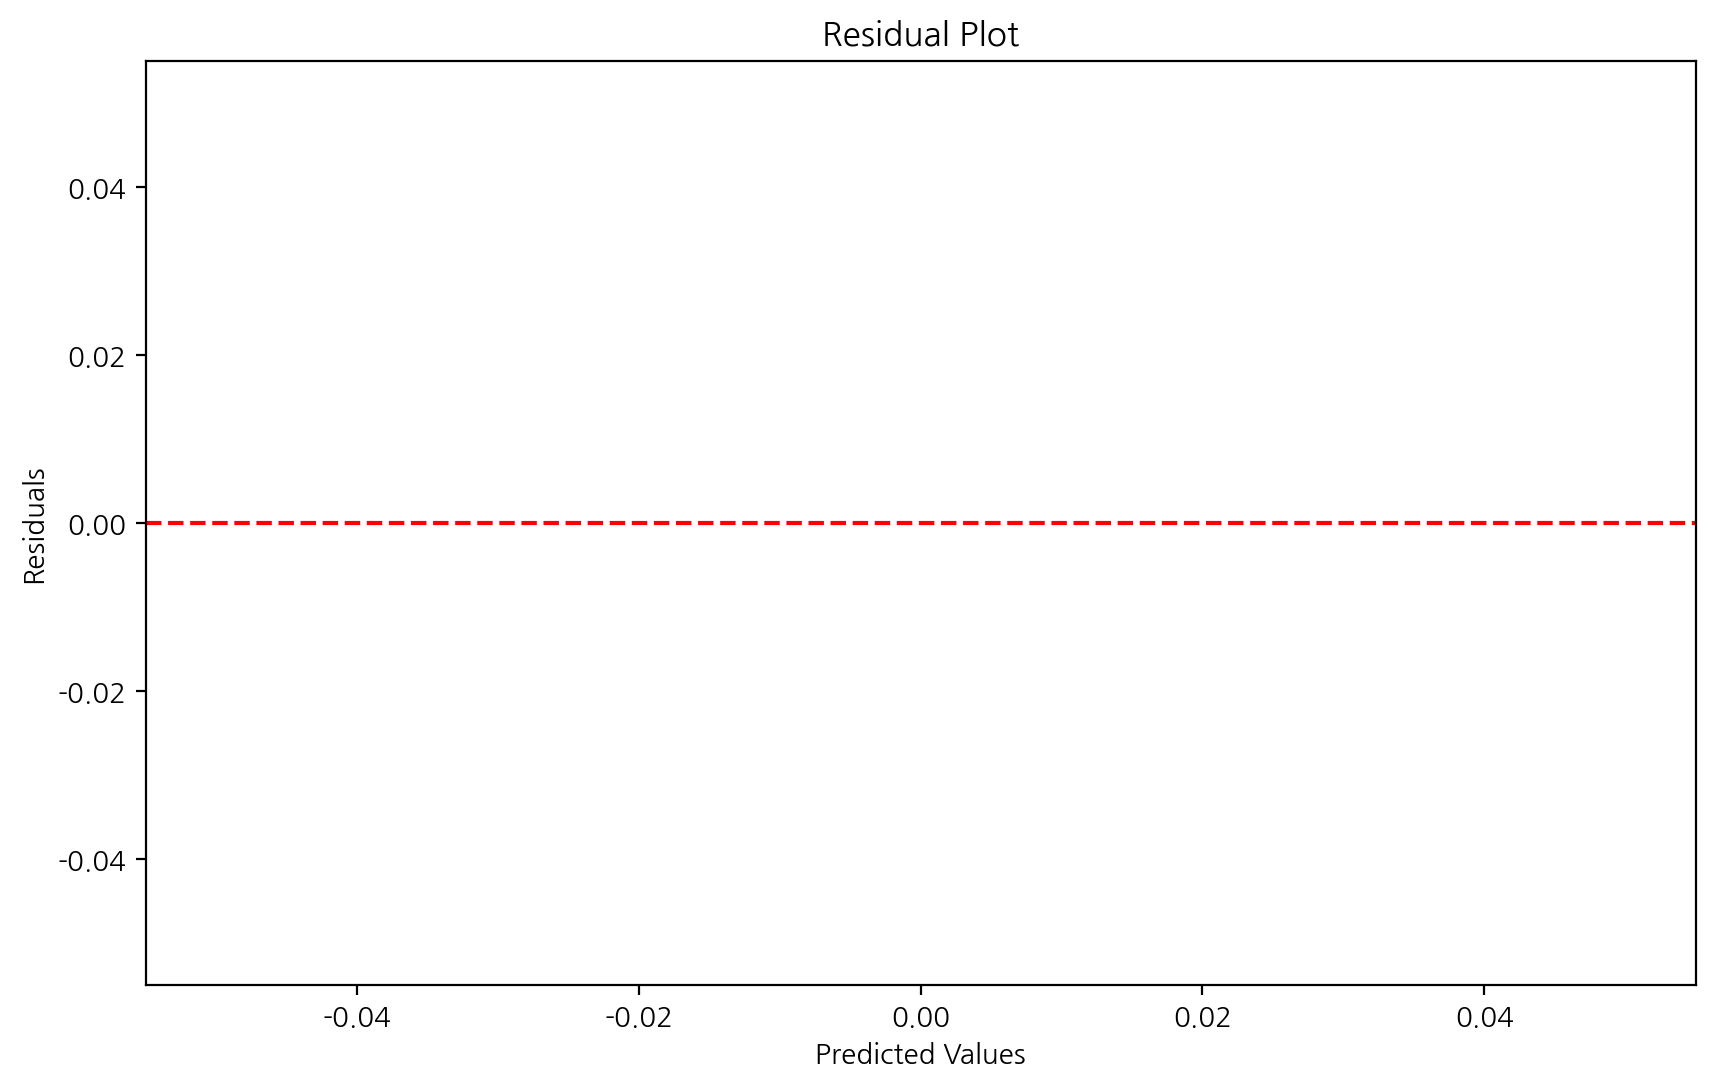

In [14]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 타입 변환 및 전처리
df_clean['Quantity'] = pd.to_numeric(df_clean['Quantity'], errors='coerce')
df_clean['UnitPrice'] = pd.to_numeric(df_clean['UnitPrice'], errors='coerce')
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], errors='coerce')

# 크리스마스 관련 변수 생성
df_clean['IsChristmasProduct'] = ((df_clean['InvoiceDate'] >= '2010-12-17') & (df_clean['InvoiceDate'] <= '2010-12-24')).astype(int)
df_clean['IsChristmasPeriod'] = df_clean['IsChristmasProduct']

# 로그 변환 및 무한대 값 처리
df_clean['LogQuantity'] = np.log1p(df_clean['Quantity'].replace([np.inf, -np.inf, 0], np.nan))
df_clean['LogUnitPrice'] = np.log1p(df_clean['UnitPrice'].replace([np.inf, -np.inf, 0], np.nan))

# 결측치 제거
df_clean = df_clean.dropna(subset=['LogQuantity', 'LogUnitPrice', 'IsChristmasProduct', 'IsChristmasPeriod', 'Country'])

# 상위 5개 국가 선택
top_5_countries = df_clean['Country'].value_counts().nlargest(5).index
df_clean = df_clean[df_clean['Country'].isin(top_5_countries)]

# 더미 변수 생성 (열 이름 자동 수정)
df_clean['Country'] = df_clean['Country'].astype('category')
df_clean = pd.get_dummies(df_clean, columns=['Country'], drop_first=True, prefix='Country')

# 생성된 더미 변수 열 이름 확인
country_dummies = [col for col in df_clean.columns if col.startswith('Country_')]
print("생성된 더미 변수 열:", country_dummies)

# 독립 변수 선택
X = df_clean[['LogUnitPrice', 'IsChristmasProduct', 'IsChristmasPeriod'] + country_dummies]

# 모든 열을 숫자형으로 변환 및 결측치 제거
X = X.apply(pd.to_numeric, errors='coerce').dropna()

# 모델 구축 (열 이름에 특수 문자가 있을 경우 Q() 함수 사용)
model_formula = 'LogQuantity ~ ' + ' + '.join([f"Q('{col}')" for col in X.columns])
model = ols(model_formula, data=df_clean).fit()

# 결과 출력
print(model.summary())

# 실제 값과 예측 값 비교
df_clean['Predicted'] = model.predict(df_clean)

plt.figure(figsize=(10, 6))
plt.scatter(df_clean['LogQuantity'], df_clean['Predicted'], alpha=0.5)
plt.plot([df_clean['LogQuantity'].min(), df_clean['LogQuantity'].max()],
         [df_clean['LogQuantity'].min(), df_clean['LogQuantity'].max()],
         'r--', lw=2)
plt.xlabel('Actual Log Quantity')
plt.ylabel('Predicted Log Quantity')
plt.title('Actual vs Predicted Log Quantity')
plt.show()

# 잔차 플롯
residuals = model.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.predict(), y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## 미션8) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩 등을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.2063

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.34    107907
           1       0.01      0.92      0.01       475

    accuracy                           0.21    108382
   macro avg       0.50      0.56      0.17    108382
weighted avg       0.99      0.21      0.34    108382



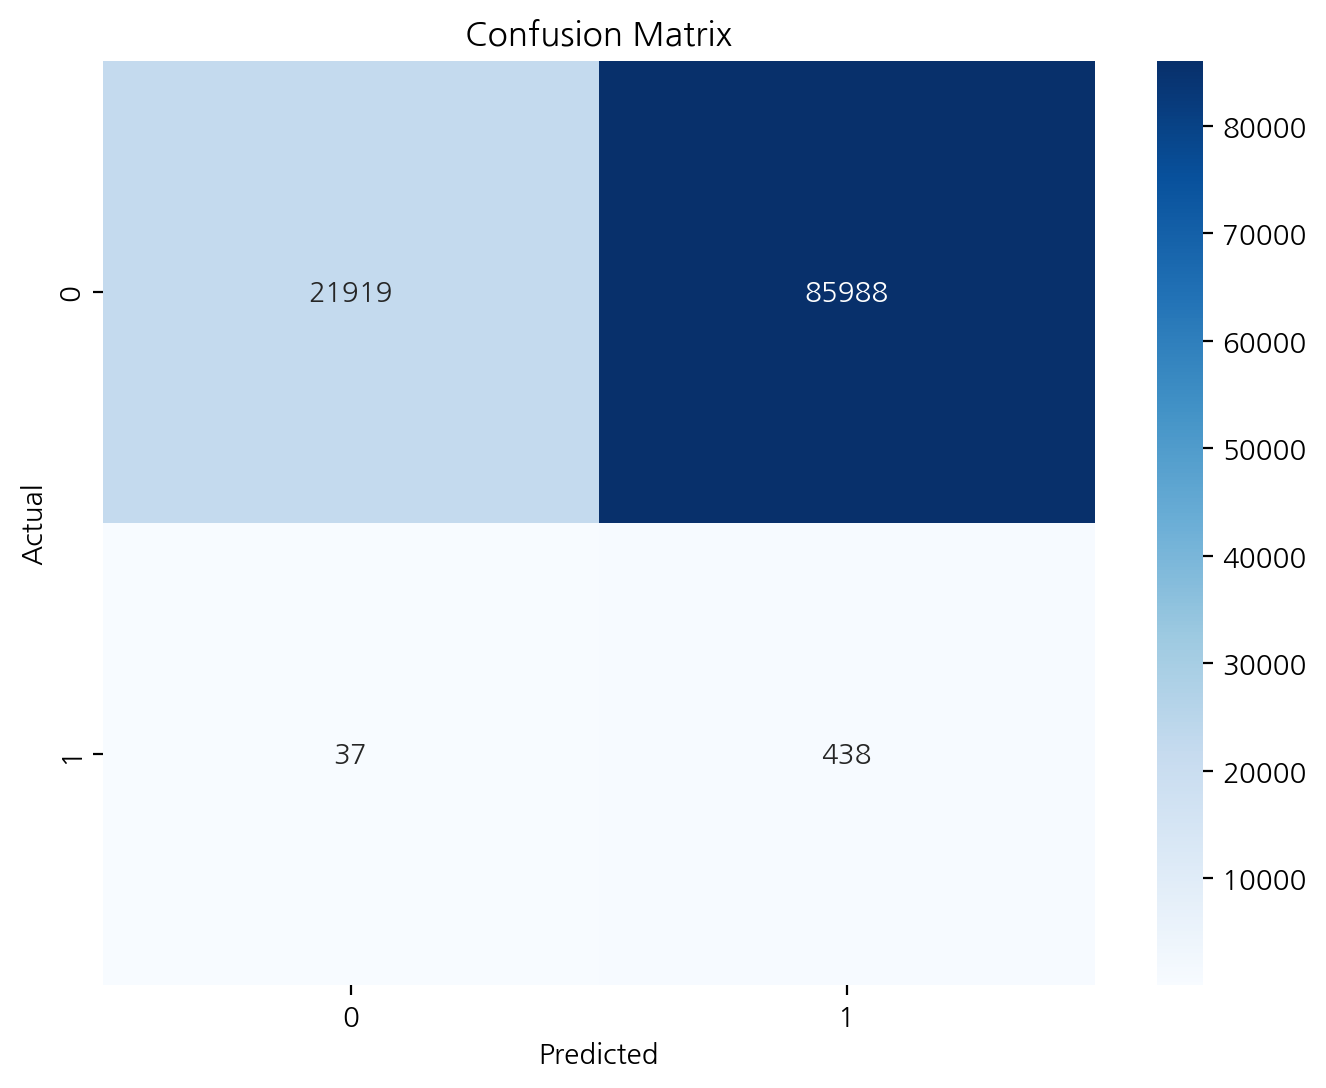

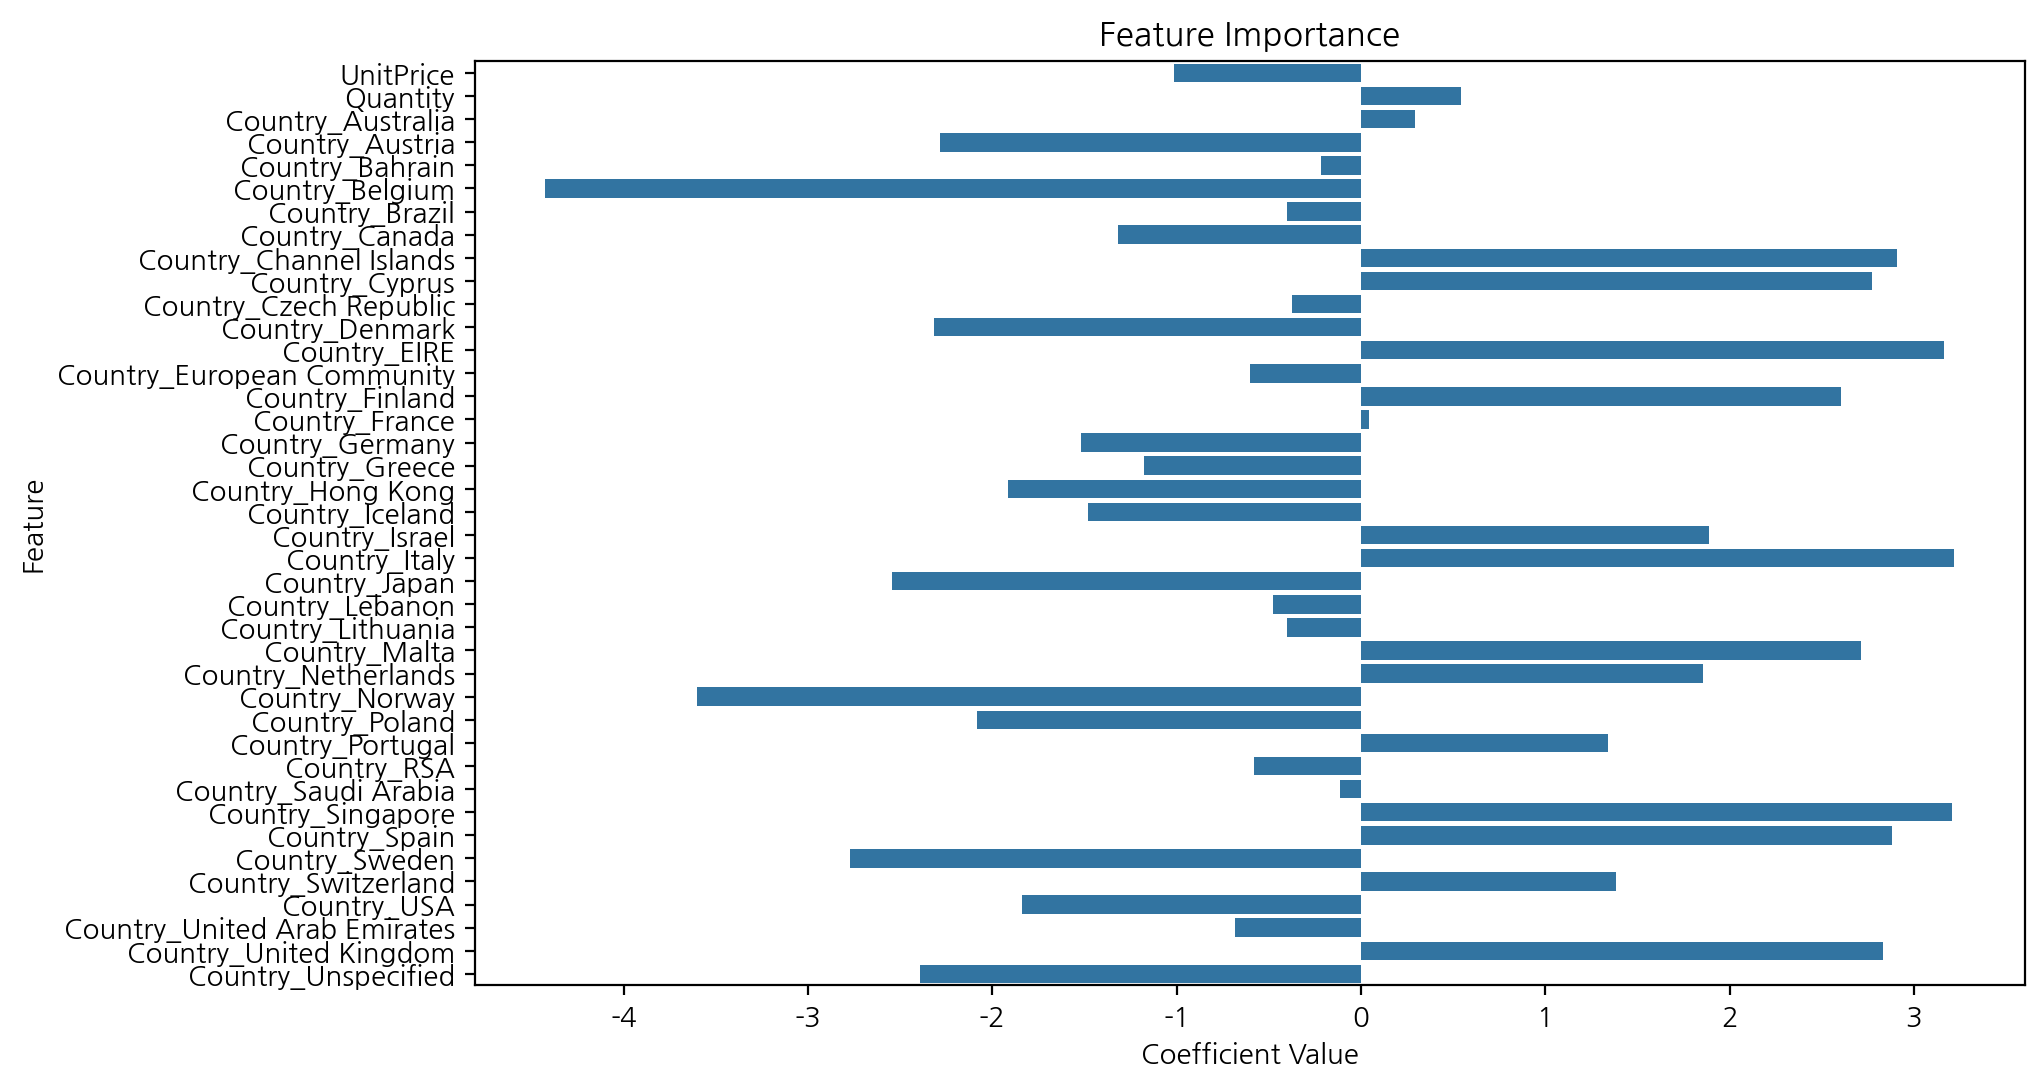

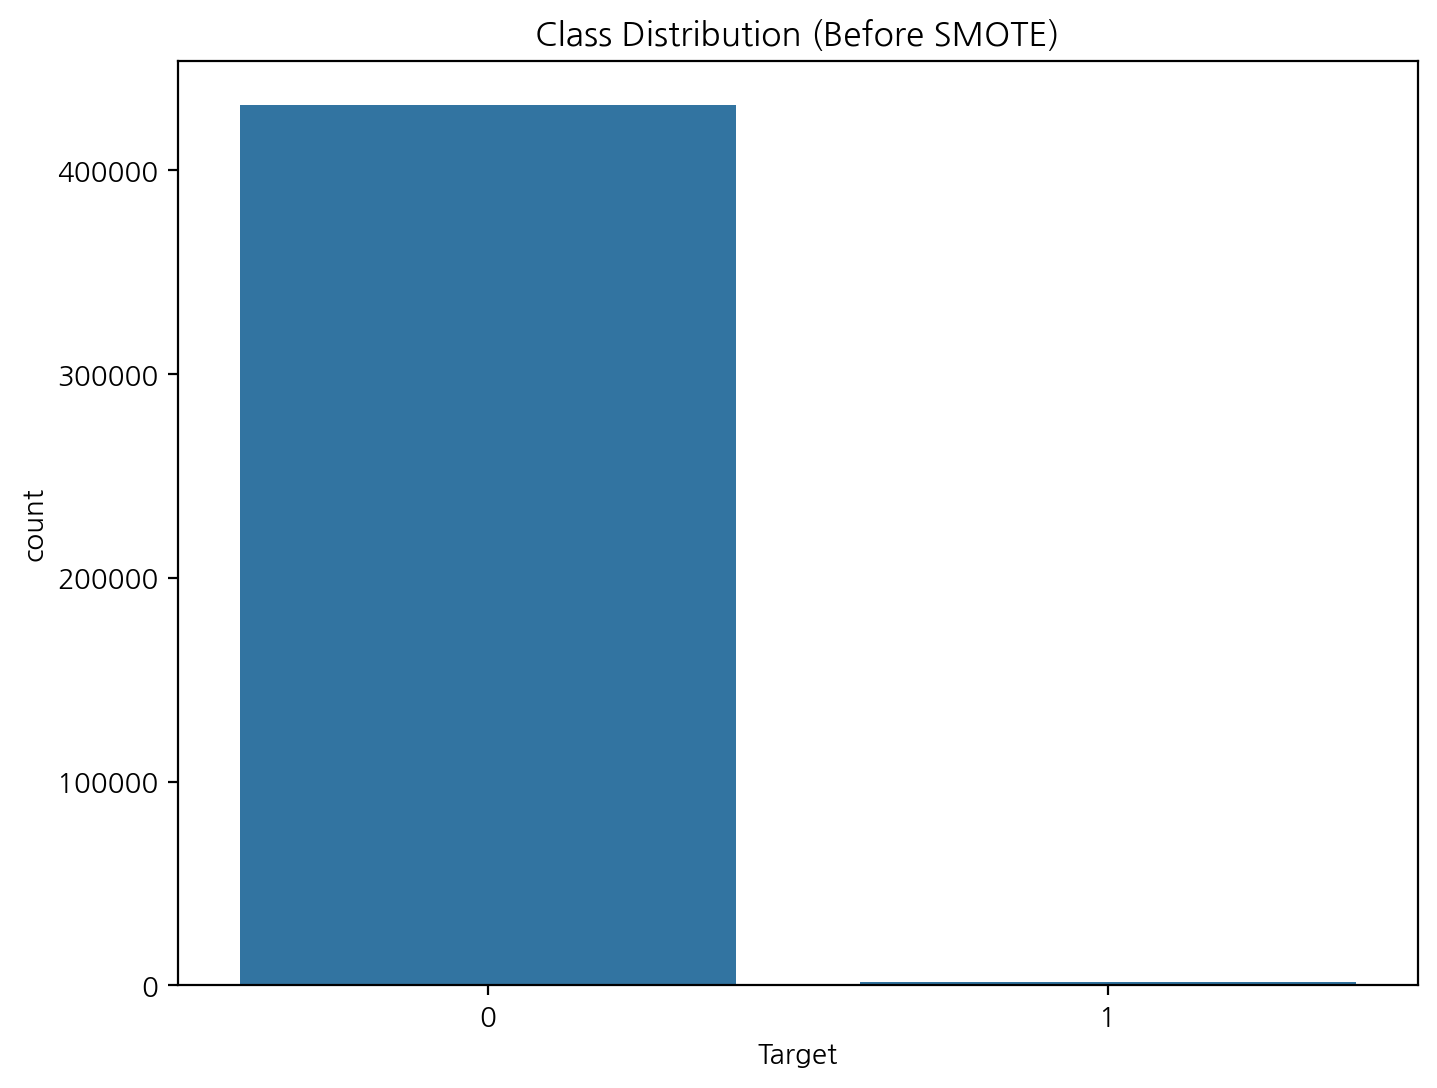

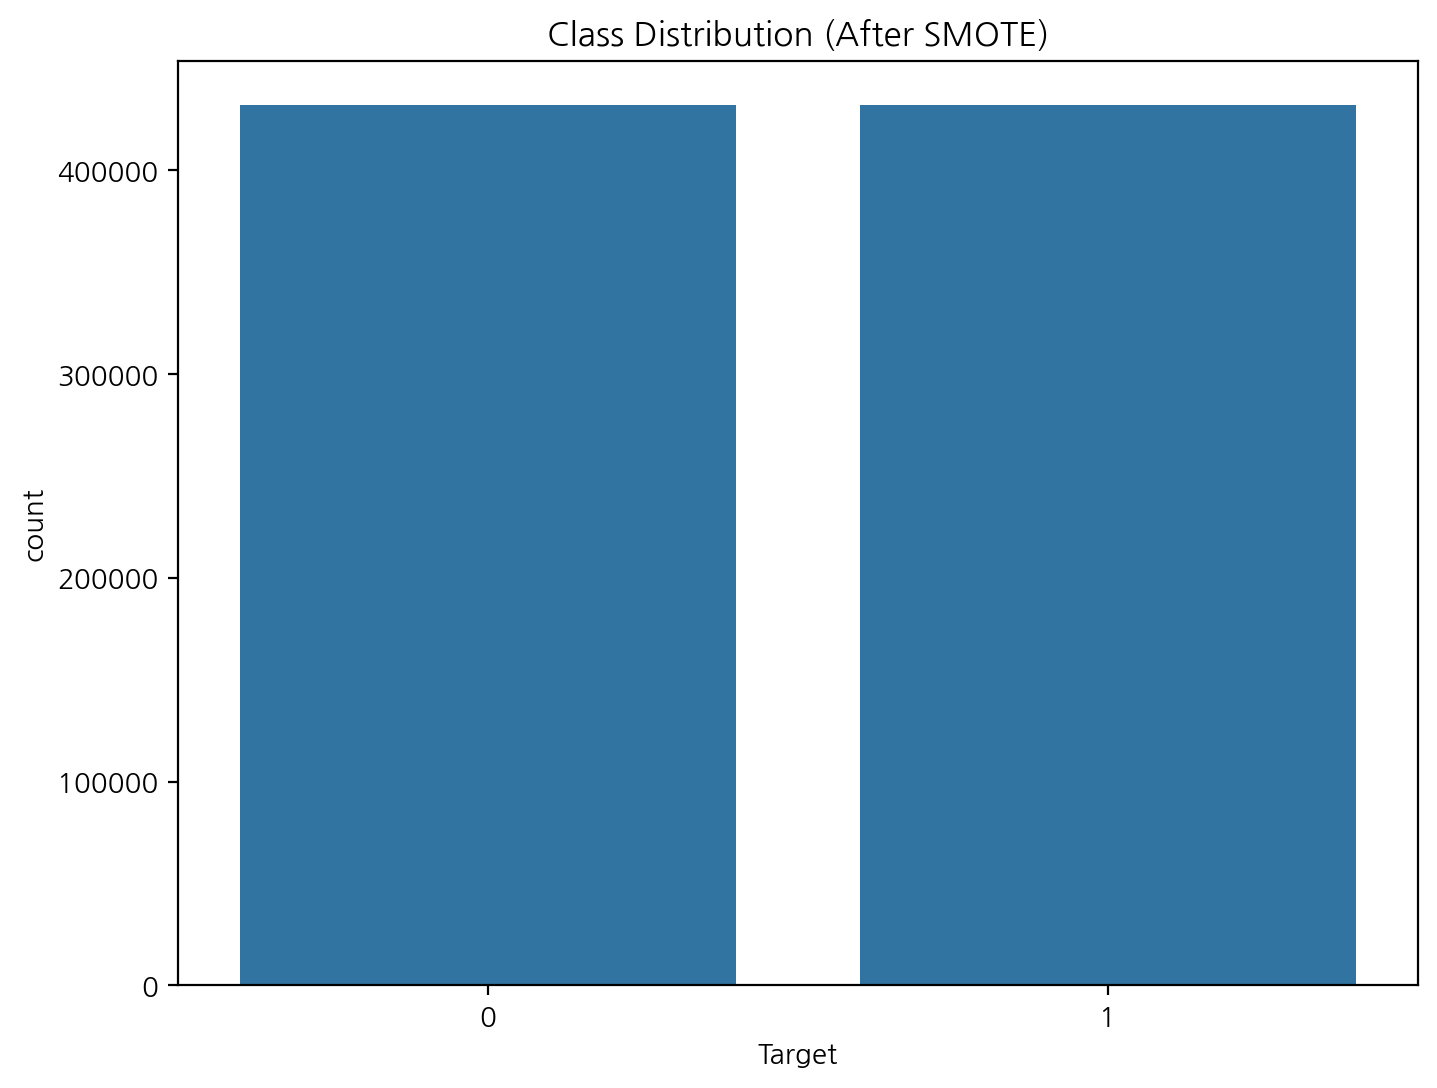

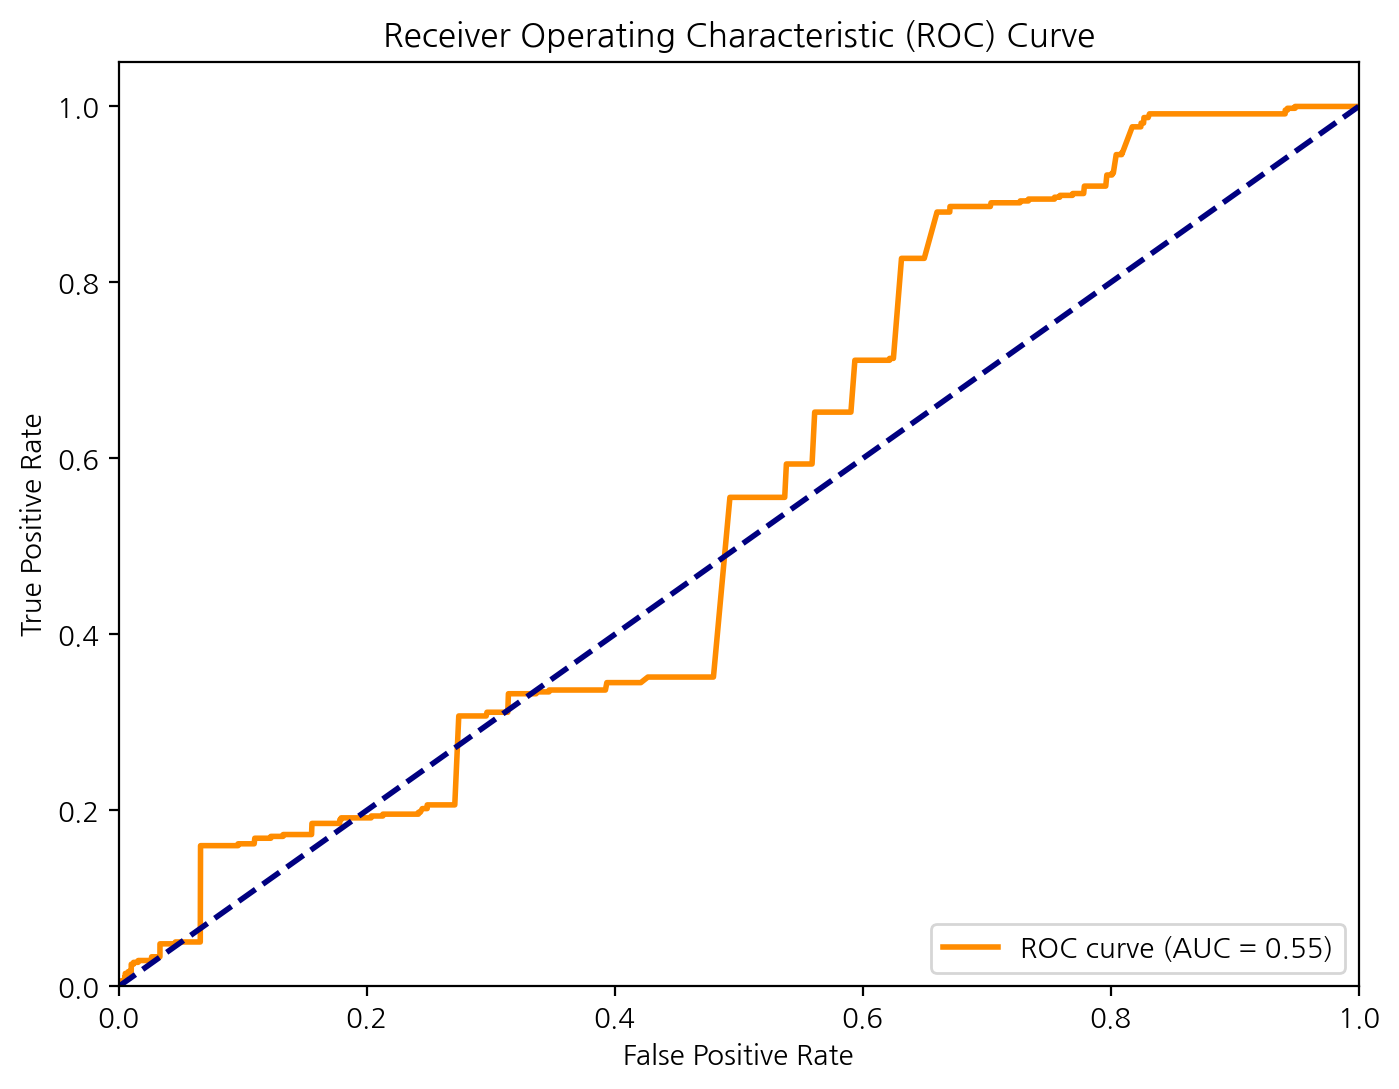

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# 1) 타겟 변수 생성
target_product = 'WHITE HANGING HEART T-LIGHT HOLDER'
df['Target'] = (df['Description'] == target_product).astype(int)

# 2) 특성 선택
features = ['UnitPrice', 'Quantity', 'Country']
X = df[features]
y = df['Target']

# 3) 범주형 변수 처리
categorical_features = ['Country']
numeric_features = ['UnitPrice', 'Quantity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 4) 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5) SMOTE를 포함한 파이프라인 생성
model = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression())
])

# 모델 학습
model.fit(X_train, y_train)

# 6) 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 특성 중요도 시각화
feature_names = (numeric_features +
                 model.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .get_feature_names_out(categorical_features).tolist())

feature_importance = model.named_steps['classifier'].coef_[0]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# 클래스 분포 시각화 (SMOTE 적용 전/후)
def plot_class_distribution(y, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y)
    plt.title(title)
    plt.show()

plot_class_distribution(y_train, 'Class Distribution (Before SMOTE)')

# SMOTE 적용 후의 클래스 분포
X_resampled, y_resampled = model.named_steps['smote'].fit_resample(
    model.named_steps['preprocessor'].fit_transform(X_train), y_train
)
plot_class_distribution(y_resampled, 'Class Distribution (After SMOTE)')

# ROC 곡선
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# 결과 해석
# SMOTE기법을 적용했지만 모델은 20.63%의 낮은 정확도를 나타냈습니다.
# 현재 모델은 거짓 양성(FP)이 매우 높아 개선이 필요해 보입니다.

In [20]:
print(df_clean.info())
print(df_clean.describe())
print(df_clean.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 508466 entries, 0 to 541908
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   InvoiceNo               508466 non-null  category      
 1   StockCode               508466 non-null  category      
 2   Description             508466 non-null  category      
 3   Quantity                508466 non-null  int32         
 4   InvoiceDate             508466 non-null  datetime64[ns]
 5   UnitPrice               508466 non-null  float64       
 6   CustomerID              380512 non-null  float32       
 7   InvoiceMonth            508466 non-null  int32         
 8   TotalPrice              508466 non-null  float64       
 9   DayOfWeek               508466 non-null  int32         
 10  WeekEnd                 508466 non-null  object        
 11  YearMonth               508466 non-null  period[M]     
 12  IsChristmasProduct      508466 non-

In [21]:
print(df_clean['LogQuantity'].describe())
print(X.describe())

count    5.084660e+05
mean             -inf
std               NaN
min              -inf
25%      6.931472e-01
50%      1.386294e+00
75%      2.397895e+00
max      7.783641e+00
Name: LogQuantity, dtype: float64
           UnitPrice       Quantity
count  541909.000000  541909.000000
mean        4.611114       9.552250
std        96.759853     218.081158
min    -11062.060000  -80995.000000
25%         1.250000       1.000000
50%         2.080000       3.000000
75%         4.130000      10.000000
max     38970.000000   80995.000000


In [ ]:
# 회고
# 위와 같이 결과가 이상하게 나온 이유를 생각해봤습니다. 추정되는 이유는 아래과 같습니다.
# 1. LogQuantity 문제:
# LogQuantity의 평균값이 '-inf'로 나타납니다. 이는 로그 변환 과정에서 0이나 음수값이 있었음을 의미합니다.
# 이로 인해 회귀 분석에서 문제가 발생했을 가능성이 높습니다.
# 2. Predicted 열:
# Predicted 열에 0개의 non-null 값이 있습니다. 즉, 모든 값이 NaN입니다.
# 이는 모델이 예측을 제대로 수행하지 못했음을 나타냅니다.
# 3. CustomerID 결측치:
# CustomerID에 127,954개의 결측치가 있습니다. 이는 전체 데이터의 약 25%에 해당합니다.
# 4. 크리스마스 관련 변수:
# IsChristmasProduct와 IsChristmasPeriod의 평균이 약 0.015로, 전체 데이터 중 약 1.5%가 크리스마스 관련 제품 또는 기간에 해당합니다.
# 5. 데이터 타입:
# 다양한 데이터 타입(bool, category, datetime64, float32, float64, int32, int64, object, period[M])이 사용되고 있어, 모델링 시 주의가 필요합니다.
# 6. Quantity 특이점:
# Quantity의 최소값이 -1입니다. 이는 반품을 나타낼 수 있으며, 모델링 시 고려해야 할 수 있습니다.
# 7. UnitPrice 범위:
# UnitPrice의 최소값이 0.001, 최대값이 18.000입니다. 이 범위가 적절한지 검토가 필요할 수 있습니다.

# 데이터의 크기가 크고 변수의 종류가 다양한데 주먹구구식으로 분석을 하고 난 후 결과가 이상하게 나온 후에야,
# 데이터를 파악하지 않고 전처리를 제대로 안 해서 정확한 결과를 도출해내지 못했다는 것을 깨달았습니다.
# 앞으로는 분석방법을 잘 숙지한 후에 분석방법을 적용하기 위해 데이터를 어떻게 전처리해야 할지 플로우를 미리 짜야겠다는 생각이 들었습니다.